###### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.graph_objs import *
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt
from dateutil import parser


###### The data set for the first meter must be reduced to exclude large outliers (>50K) and NaN values, which is done in the following:

##### Importing updated data, and all CMLP data till May 29

In [2]:
#btu331_tot = pd.read_csv("/Users/MHK/Documents/Rahim/Western/research17/DataExp/cmlp_full_coppercube_2905/CMLP_331_BTU_CONSUM_TOT_TL.csv")
#flw331_tot = pd.read_csv("/Users/MHK/Documents/Rahim/Western/research17/DataExp/cmlp_full_coppercube_2905/CMLP_331_FLW_TOTAL_TL.csv")
#dcwFlw_tot = pd.read_csv("/Users/MHK/Documents/Rahim/Western/research17/DataExp/cmlp_full_coppercube_2905/CMLP_DCW_FLW_TOT_TL.csv")
#dhwBtu_tot = pd.read_csv("/Users/MHK/Documents/Rahim/Western/research17/DataExp/cmlp_full_coppercube_2905/CMLP_DHW_BTU_CONSUM_TOT_TL.csv")
#dhwStm_tot = pd.read_csv("/Users/MHK/Documents/Rahim/Western/research17/DataExp/cmlp_full_coppercube_2905/CMLP_DHW_STM_TOTAL_TL.csv")
#dwMtr_tot = pd.read_csv("/Users/MHK/Documents/Rahim/Western/research17/DataExp/cmlp_full_coppercube_2905/CMLP_DW_MTR_TOTAL_AV_TL.csv")
#dwMtr_usg = pd.read_csv("/Users/MHK/Documents/Rahim/Western/research17/DataExp/cmlp_full_coppercube_2905/CMLP_DW_MTR_USAGE_AV_TL.csv")
#ethanolBtu_tot = pd.read_csv("/Users/MHK/Documents/Rahim/Western/research17/DataExp/cmlp_full_coppercube_2905/CMLP_ETHANOL_BTU_CONSUM_TOT_TL.csv")
#ethanolFlw_tot = pd.read_csv("/Users/MHK/Documents/Rahim/Western/research17/DataExp/cmlp_full_coppercube_2905/CMLP_ETHANOL_FLW_TOT_TL.csv")
#grdlEnergy_tot = pd.read_csv("/Users/MHK/Documents/Rahim/Western/research17/DataExp/cmlp_full_coppercube_2905/CMLP_GRDL_ENERGY_TOTAL_TL.csv")
#grdlFlw_tot = pd.read_csv("/Users/MHK/Documents/Rahim/Western/research17/DataExp/cmlp_full_coppercube_2905/CMLP_GRDL_FLW TOT_TL.csv")
#greywaterFlw_tot = pd.read_csv("/Users/MHK/Documents/Rahim/Western/research17/DataExp/cmlp_full_coppercube_2905/CMLP_GREYWATER_FLW TOT_TL.csv")
#labFlw_tot = pd.read_csv("/Users/MHK/Documents/Rahim/Western/research17/DataExp/cmlp_full_coppercube_2905/CMLP_LAB_FLW TOT_TL.csv")
m1kWThermalCalc = pd.read_csv("/Users/MHK/Documents/Rahim/Western/research17/DataExp/cmlp_full_coppercube_2905/CMLP_M1_OGG_Max_kW_Thermal_Demand_Calc_TL.csv")
m1kWThermalRaw = pd.read_csv("/Users/MHK/Documents/Rahim/Western/research17/DataExp/cmlp_full_coppercube_2905/CMLP_M1_OGG_kW_Thermal_Demand_Raw_TL1032.csv")
m1kWtot = pd.read_csv("/Users/MHK/Documents/Rahim/Western/research17/DataExp/cmlp_full_coppercube_2905/CMLP_M1_OGG_kW_Total_METER_TL.csv")
m1kWh_tot = pd.read_csv("/Users/MHK/Documents/Rahim/Western/research17/DataExp/cmlp_full_coppercube_2905/CMLP_M1_OGG_kWh_Total_TL.csv")
m2kWThermalCalc = pd.read_csv("/Users/MHK/Documents/Rahim/Western/research17/DataExp/cmlp_full_coppercube_2905/CMLP_M2_Tx-A_Max_kW_Thermal_Demand_Calc_TL.csv")
m2kWThermalRaw = pd.read_csv("/Users/MHK/Documents/Rahim/Western/research17/DataExp/cmlp_full_coppercube_2905/CMLP_M3_Tx-B_kW_Thermal_Demand_Raw_TL.csv")
m2kWtot = pd.read_csv("/Users/MHK/Documents/Rahim/Western/research17/DataExp/cmlp_full_coppercube_2905/CMLP_M2_Tx-A_kW_Total_METER_TL.csv")
m3kWThermalCalc = pd.read_csv("/Users/MHK/Documents/Rahim/Western/research17/DataExp/cmlp_full_coppercube_2905/CMLP_M3_Tx-B_Max_kW_Thermal_Demand_Calc_TL.csv")
m3kWThermalRaw = pd.read_csv("/Users/MHK/Documents/Rahim/Western/research17/DataExp/cmlp_full_coppercube_2905/CMLP_M3_Tx-B_kW_Thermal_Demand_Raw_TL.csv")
m4kWThermalCalc = pd.read_csv("/Users/MHK/Documents/Rahim/Western/research17/DataExp/cmlp_full_coppercube_2905/CMLP_M4_MLDP_SUB_Max_kW_Thermal_Demand_Calc_TL.csv")
m4kWThermalRaw = pd.read_csv("/Users/MHK/Documents/Rahim/Western/research17/DataExp/cmlp_full_coppercube_2905/CMLP_M4_MLDP_SUB_kW_Thermal_Demand_Raw_TL.csv")
m5kWThermalCalc = pd.read_csv("/Users/MHK/Documents/Rahim/Western/research17/DataExp/cmlp_full_coppercube_2905/CMLP_M5_MHDP_ION_Max_kW_Thermal_Demand_Calc_TL.csv")
m5kWThermalRaw = pd.read_csv("/Users/MHK/Documents/Rahim/Western/research17/DataExp/cmlp_full_coppercube_2905/CMLP_M5_MHDP_ION_kW_Thermal_Demand_Raw_TL.csv")
m5kWtot = pd.read_csv("/Users/MHK/Documents/Rahim/Western/research17/DataExp/cmlp_full_coppercube_2905/CMLP_M5_MHDP_ION_kW_Total_METER_TL.csv")
m5kWh_tot = pd.read_csv("/Users/MHK/Documents/Rahim/Western/research17/DataExp/cmlp_full_coppercube_2905/CMLP_M5_MHDP_kWh_Total_TL.csv")
m6kWh_tot = pd.read_csv("/Users/MHK/Documents/Rahim/Western/research17/DataExp/cmlp_full_coppercube_2905/CMLP_M6_EMERGCY_kWh_Total_TL.csv")
m6kWThermalCalc = pd.read_csv("/Users/MHK/Documents/Rahim/Western/research17/DataExp/cmlp_full_coppercube_2905/CMLP_M6_EMERGNCY_ION_Max_kW_Thermal_Demand_Calc_TL.csv")
m6kWThermalRaw = pd.read_csv("/Users/MHK/Documents/Rahim/Western/research17/DataExp/cmlp_full_coppercube_2905/CMLP_M6_EMERGNCY_ION_kW_Thermal_Demand_Raw_TL.csv")
m6kWtot = pd.read_csv("/Users/MHK/Documents/Rahim/Western/research17/DataExp/cmlp_full_coppercube_2905/CMLP_M6_EMERGNCY_ION_kW_Total_METER_TL.csv")
#makeupwaterFlw_tot = pd.read_csv("/Users/MHK/Documents/Rahim/Western/research17/DataExp/cmlp_full_coppercube_2905/CMLP_MAKEUP WATER_FLW TOT_TL.csv")
mldpSub_kWh_tot = pd.read_csv("/Users/MHK/Documents/Rahim/Western/research17/DataExp/cmlp_full_coppercube_2905/CMLP_MLDP_SUB_kWh_Total_TL.csv")
m2kWh_tot = pd.read_csv("/Users/MHK/Documents/Rahim/Western/research17/DataExp/cmlp_full_coppercube_2905/CMLP_MLDP_Tx-A_kWh_Total_TL.csv")
m3kWh_tot = pd.read_csv("/Users/MHK/Documents/Rahim/Western/research17/DataExp/cmlp_full_coppercube_2905/CMLP_MLDP_Tx-B_kWh_Total_TL.csv")
#radwaterFlw_tot = pd.read_csv("/Users/MHK/Documents/Rahim/Western/research17/DataExp/cmlp_full_coppercube_2905/CMLP_RAD WATER_FLW_TOT_TL.csv")
#radBtu_tot = pd.read_csv("/Users/MHK/Documents/Rahim/Western/research17/DataExp/cmlp_full_coppercube_2905/CMLP_RAD_BTU_CONSUM_TOT_TL.csv")
#rainwaterSaving_tot = pd.read_csv("/Users/MHK/Documents/Rahim/Western/research17/DataExp/cmlp_full_coppercube_2905/CMLP_RAINWATER_SAVING TOT_TL.csv")
#reheatBtu_tot = pd.read_csv("/Users/MHK/Documents/Rahim/Western/research17/DataExp/cmlp_full_coppercube_2905/CMLP_REHEAT_BTU_CONSUM_TOT_TL.csv")
#reheatFlw_tot = pd.read_csv("/Users/MHK/Documents/Rahim/Western/research17/DataExp/cmlp_full_coppercube_2905/CMLP_REHEAT_FLW_TOT_TL.csv")
#steamBtu_tot = pd.read_csv("/Users/MHK/Documents/Rahim/Western/research17/DataExp/cmlp_full_coppercube_2905/CMLP_STEAM_BTU_CONSUM_TOT_TL.csv")
#steamFlw_tot = pd.read_csv("/Users/MHK/Documents/Rahim/Western/research17/DataExp/cmlp_full_coppercube_2905/CMLP_STEAM_FLW_TOT_TL.csv")
#stmMtr2_tot = pd.read_csv("/Users/MHK/Documents/Rahim/Western/research17/DataExp/cmlp_full_coppercube_2905/CMLP_STM_MTR_2_TOTAL_AV_TL.csv")
#stmMtr2_usg = pd.read_csv("/Users/MHK/Documents/Rahim/Western/research17/DataExp/cmlp_full_coppercube_2905/CMLP_STM_MTR_2_USAGE_AV_TL.csv")
#stmMtr1_tot = pd.read_csv("/Users/MHK/Documents/Rahim/Western/research17/DataExp/cmlp_full_coppercube_2905/CMLP_STM_MTR_TOTAL_AV_TL.csv")
#stmMtr1_usg = pd.read_csv("/Users/MHK/Documents/Rahim/Western/research17/DataExp/cmlp_full_coppercube_2905/CMLP_STM_MTR_USAGE_AV_TL.csv")


###### Not used in analysis - different time window/non-electricity

###### Left out for now (different units - ton-hr) - and slightly out-of-time-window

# 26/10/2015, 30/05/2012

###### 26/10/2015

###### 30/05/2012

In [3]:
m5kWThermalRaw.describe(include="all")

m5kWThermalRaw=m5kWThermalRaw.rename(columns={'v':'m5kWthermalRaw'})
m5kWThermalRaw

m3kWh_tot.describe()

m3kWh_tot = m3kWh_tot.rename(columns = {'v':'m3kWh_tot'})
m3kWh_tot

m2kWh_tot.describe()

m2kWh_tot = m2kWh_tot.rename(columns = {'v':'m2kWh_tot'})
m2kWh_tot

m5kWThermalCalc.describe()

m5kWThermalCalc = m5kWThermalCalc.rename(columns = {'v':'m5kWthermalCalc'})
m5kWThermalCalc

m4kWThermalRaw.describe()

m4kWThermalRaw = m4kWThermalRaw.rename(columns = {'v':'m4kWthermalRaw'})
m4kWThermalRaw

m4kWThermalCalc.describe()
m4kWThermalCalc = m4kWThermalCalc.rename(columns = {'v':'m4kWthermalCalc'})
m4kWThermalCalc

m3kWThermalRaw.describe()

m3kWThermalRaw = m3kWThermalRaw.rename(columns = {'v':'m3kWthermalRaw'})
m3kWThermalRaw

m3kWThermalCalc.describe()

m3kWThermalCalc = m3kWThermalCalc.rename(columns={'v':'m3kWthermalCalc'})
m3kWThermalCalc

m2kWtot.describe()

m2kWtot = m2kWtot.rename(columns = {'v':'m2kWtot'})
m2kWtot

m2kWThermalRaw.describe()

m2kWThermalRaw=m2kWThermalRaw.rename(columns = {'v':'m2kWthermalRaw'})
m2kWThermalRaw
m2kWThermalCalc.describe()

m2kWThermalCalc=m2kWThermalCalc.rename(columns = {'v':'m2kWthermalCalc'})
m2kWThermalCalc

m1kWh_tot.describe()

m1kWh_tot = m1kWh_tot.rename(columns = {'v':'m1kWh_tot'})
m1kWh_tot

m1kWThermalRaw.describe()

m1kWThermalRaw=m1kWThermalRaw.rename(columns = {'v':'m1kWthermalRaw'})
m1kWThermalRaw

m1kWThermalCalc.describe()
m1kWThermalCalc = m1kWThermalCalc.rename(columns = {'v':'m1kWthermalCalc'})
m1kWThermalCalc
m6kWThermalRaw.describe()

m6kWThermalRaw = m6kWThermalRaw.rename(columns = {'v':'m6kWthermalRaw'})
m6kWThermalRaw

m6kWThermalCalc.describe()

m6kWThermalCalc = m6kWThermalCalc.rename(columns = {'v':'m6kWthermalCalc'})
m6kWThermalCalc

m6kWh_tot.describe()

m6kWh_tot = m6kWh_tot.rename(columns={'v':'m6kWh_tot'})
m6kWh_tot

m5kWh_tot.describe()

m5kWh_tot = m5kWh_tot.rename(columns={'v':'m5kWh_tot'})
m5kWh_tot

mldpSub_kWh_tot.describe()

mldpSub_kWh_tot = mldpSub_kWh_tot.rename(columns = {'v':'mldpSub_kWh_tot'})
mldpSub_kWh_tot

,seq,t,ts,mldpSub_kWh_tot
0,999585951,2,2012-05-30 00:00:00.100,366695.0
1,999585952,0,2012-05-30 06:23:23.800,32770.0
2,999585953,0,2012-05-30 06:23:23.800,2.0
3,999585954,0,2012-05-30 20:03:23.800,32770.0
4,999585955,0,2012-05-30 20:03:23.800,2.0
5,999585956,2,2012-05-30 20:05:00.100,366695.0
6,999585957,2,2012-05-30 20:10:00.100,366695.0
7,999585958,2,2012-05-30 20:15:00.100,366695.0
8,999585959,2,2012-05-30 20:20:00.000,366695.0
9,999585960,2,2012-05-30 20:25:00.100,366695.0


###### Removing last row of some df so that ending time is the same

In [4]:
m1kWThermalRaw;

(m1kWThermalCalc);

m1kWh_tot=m1kWh_tot[:-1]

m2kWThermalRaw=m2kWThermalRaw[:-1]
m2kWThermalCalc=m2kWThermalCalc[:-1];
m2kWtot=m2kWtot[:-1];
m2kWh_tot=m2kWh_tot[:-1];

m3kWThermalRaw=m3kWThermalRaw[:-1];
m3kWThermalCalc=m3kWThermalCalc[:-1];
m3kWh_tot=m3kWh_tot[:-1];

m4kWThermalRaw=m4kWThermalRaw[:-1];
m4kWThermalCalc=m4kWThermalCalc[:-1];

m5kWThermalRaw=m5kWThermalRaw[:-1];
m5kWThermalCalc=m5kWThermalCalc[:-1];
m5kWh_tot=m5kWh_tot[:-1];

m6kWThermalRaw=m6kWThermalRaw[:-1];
m6kWThermalCalc=m6kWThermalCalc[:-1];
m6kWh_tot=m6kWh_tot[:-1];

mldpSub_kWh_tot=mldpSub_kWh_tot[:-1];

###### Checking if the dfs have NaN

In [5]:
def numna (x):
    return sum(x.isnull())



In [6]:
allDF = [m1kWThermalRaw, m1kWThermalCalc, m1kWh_tot, 
         m2kWThermalRaw, m2kWThermalCalc, m2kWtot, m2kWh_tot, 
         m3kWThermalRaw, m3kWThermalCalc, m3kWh_tot, m4kWThermalRaw, 
         m4kWThermalCalc, m5kWThermalRaw, m5kWThermalCalc, m5kWh_tot, 
         m6kWThermalRaw, m6kWThermalCalc, m6kWh_tot, mldpSub_kWh_tot]


In [7]:
m1kWThermalRaw.describe(include=["O"])

,ts
count,462750
unique,424483
top,2016-10-01 13:35:00.000
freq,1001


In [8]:
for dataframe in allDF:
    print([min(dataframe["ts"]),max(dataframe.ts)])
    print(dataframe.apply(func = numna, axis = 0))


['2012-05-30 00:00:00.100', '2017-05-29 10:20:00.000']
seq               0
t                 0
ts                0
m1kWthermalRaw    0
dtype: int64
['2012-05-30 00:00:00.100', '2017-05-29 10:20:00.000']
seq                0
t                  0
ts                 0
m1kWthermalCalc    0
dtype: int64
['2012-05-30 00:00:00.100', '2017-05-29 10:20:00.000']
seq          0
t            0
ts           0
m1kWh_tot    0
dtype: int64
['2012-05-30 00:00:00.100', '2017-05-29 10:20:00.000']
seq               0
t                 0
ts                0
m2kWthermalRaw    0
dtype: int64
['2012-05-30 00:00:00.100', '2017-05-29 10:20:00.000']
seq                0
t                  0
ts                 0
m2kWthermalCalc    0
dtype: int64
['2012-05-30 00:00:00.100', '2017-05-29 10:20:00.000']
seq        0
t          0
ts         0
m2kWtot    0
dtype: int64
['2012-05-30 00:00:00.100', '2017-05-29 10:20:00.000']
seq          0
t            0
ts           0
m2kWh_tot    0
dtype: int64
['2012-05-30 00:00:00.10

In [9]:
def nunique_percolumn (series):
    return series.nunique()

for dataframe in allDF:
    print(dataframe.apply(func=nunique_percolumn,axis=0))
    print('\n')

seq               462750
t                      4
ts                424483
m1kWthermalRaw        78
dtype: int64


seq                460749
t                       4
ts                 422483
m1kWthermalCalc        78
dtype: int64


seq          498483
t                 4
ts           470649
m1kWh_tot      6025
dtype: int64


seq               458025
t                      4
ts                420760
m2kWthermalRaw       693
dtype: int64


seq                460012
t                       4
ts                 422730
m2kWthermalCalc       407
dtype: int64


seq        460884
t               4
ts         425621
m2kWtot       634
dtype: int64


seq          456061
t                 4
ts           419605
m2kWh_tot    194143
dtype: int64


seq               458025
t                      4
ts                420760
m3kWthermalRaw       693
dtype: int64


seq                462014
t                       4
ts                 424732
m3kWthermalCalc       499
dtype: int64


seq          456057
t

In [10]:
trueDFs = [m2kWh_tot, m3kWh_tot, m5kWh_tot, m6kWh_tot, mldpSub_kWh_tot] 
# Only those with no outrageously small number of repeated values

In [11]:
#print size of each df
for df in trueDFs:
    print(df.shape)

(456061, 4)
(456057, 4)
(496481, 4)
(496476, 4)
(462058, 4)


In [12]:
#removing first five rows for all dfs in trueDFs because of weird numbers - out of time stamp order. 
m2kWh_tot=m2kWh_tot[5:]

m3kWh_tot=m3kWh_tot[5:] 
m5kWh_tot=m5kWh_tot[5:]
m6kWh_tot=m6kWh_tot[5:]
mldpSub_kWh_tot = mldpSub_kWh_tot[5:]

###### Converting string timestamps to datetime-object timestamps

In [13]:
timeEg = m2kWh_tot.loc[8,'ts']
print(timeEg)

dt = parser.parse(timeEg)
dt.minute

2012-05-30 20:20:00.200


20

In [14]:
#understanding references in Python - using loc to access an element does so by passing the value of the element, ...
#...NOT a reference var
#Python is defitely object oriented though, for other variables. 

testdf = pd.DataFrame({'first':[1,2,3,4,5],'second':[6,7,8,9,10]})
print(testdf)

a = testdf.loc[0,'first'] #creates new column with name '0, first' lol
print('a: ',a)
testdf = testdf[['first','second']] #reverses above code
testdf.loc[0,'first'] = 'a' # changes value of an element in df 
print(testdf)

print('a:', a)

   first  second
0      1       6
1      2       7
2      3       8
3      4       9
4      5      10
a:  1
  first  second
0     a       6
1     2       7
2     3       8
3     4       9
4     5      10
a: 1


In [15]:
m2kWh_tot['ts']=pd.to_datetime(m2kWh_tot['ts'])

/Users/MHK/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [16]:
m2kWh_tot

,seq,t,ts,m2kWh_tot
5,999591953,2,2012-05-30 20:05:00.100,583508.0
6,999591954,2,2012-05-30 20:10:00.000,583510.0
7,999591955,2,2012-05-30 20:15:00.100,583512.0
8,999591956,2,2012-05-30 20:20:00.200,583514.0
9,999591957,2,2012-05-30 20:25:00.100,583516.0
10,999591958,2,2012-05-30 20:30:00.000,583517.0
11,999591959,2,2012-05-30 20:35:00.000,583519.0
12,999591960,2,2012-05-30 20:40:00.000,583521.0
13,999591961,2,2012-05-30 20:45:00.000,583522.0
14,999591962,2,2012-05-30 20:50:00.000,583524.0


In [17]:
timeEg = m2kWh_tot.loc[456059,'ts']
timeEg.minute

15

In [18]:
m2kWh_tot = m2kWh_tot[['seq','t','ts','m2kWh_tot']]

In [19]:
m2kWh_tot

,seq,t,ts,m2kWh_tot
5,999591953,2,2012-05-30 20:05:00.100,583508.0
6,999591954,2,2012-05-30 20:10:00.000,583510.0
7,999591955,2,2012-05-30 20:15:00.100,583512.0
8,999591956,2,2012-05-30 20:20:00.200,583514.0
9,999591957,2,2012-05-30 20:25:00.100,583516.0
10,999591958,2,2012-05-30 20:30:00.000,583517.0
11,999591959,2,2012-05-30 20:35:00.000,583519.0
12,999591960,2,2012-05-30 20:40:00.000,583521.0
13,999591961,2,2012-05-30 20:45:00.000,583522.0
14,999591962,2,2012-05-30 20:50:00.000,583524.0


In [20]:
m2kWh_tot.loc[456060,'ts'].minute

20

###### Iterating over df rows to remove any duplicated/out-of-sequence timestamped-rows

In [21]:
testdf = pd.DataFrame({'1':[1,2,3,4,5,6,7,8,9],'2':[1,2,3,4,5,6,7,8,9],'3':[1,2,3,4,6,8,7,8,9],'4':[1,2,3,4,5,6,7,8,9],'5':[1,2,3,4,5,6,7,8,9],'6':[1,2,3,4,5,6,7,8,9],'7':np.arange(9)})

In [22]:
testdf

,1,2,3,4,5,6,7
0,1,1,1,1,1,1,0
1,2,2,2,2,2,2,1
2,3,3,3,3,3,3,2
3,4,4,4,4,4,4,3
4,5,5,6,5,5,5,4
5,6,6,8,6,6,6,5
6,7,7,7,7,7,7,6
7,8,8,8,8,8,8,7
8,9,9,9,9,9,9,8


In [23]:
testdf.iterrows()

<generator object DataFrame.iterrows at 0x153faf5c8>

In [24]:
from itertools import *
j = 0 #to keep track of position of last unmarked row so a comparison can be made to it. 
for i,row in islice(testdf.iterrows(),1,None):
    print('i value: ',i, '\nj value before while loop: ', j)
    
    # increase j so that if there is an intermediate marked number, then the next non-marked number can be the point of reference.  '
    while testdf.iloc[j,2]=='rm':
        j+=1
    
    print('j value after while loop (comparison): ',j)
    
    if testdf.iloc[i,2] == 2*testdf.iloc[j,2]:
        print('i (if block): ', i,'\n')
        print(testdf,'\n')
        j+=1
        continue
    else:
        print('i (else block): ',i,'\n')
        testdf.iloc[i,2] = 'rm'
    
    print(testdf,'\n')



i value:  1 
j value before while loop:  0
j value after while loop (comparison):  0
i (if block):  1 

   1  2  3  4  5  6  7
0  1  1  1  1  1  1  0
1  2  2  2  2  2  2  1
2  3  3  3  3  3  3  2
3  4  4  4  4  4  4  3
4  5  5  6  5  5  5  4
5  6  6  8  6  6  6  5
6  7  7  7  7  7  7  6
7  8  8  8  8  8  8  7
8  9  9  9  9  9  9  8 

i value:  2 
j value before while loop:  1
j value after while loop (comparison):  1
i (else block):  2 

   1  2   3  4  5  6  7
0  1  1   1  1  1  1  0
1  2  2   2  2  2  2  1
2  3  3  rm  3  3  3  2
3  4  4   4  4  4  4  3
4  5  5   6  5  5  5  4
5  6  6   8  6  6  6  5
6  7  7   7  7  7  7  6
7  8  8   8  8  8  8  7
8  9  9   9  9  9  9  8 

i value:  3 
j value before while loop:  1
j value after while loop (comparison):  1
i (if block):  3 

   1  2   3  4  5  6  7
0  1  1   1  1  1  1  0
1  2  2   2  2  2  2  1
2  3  3  rm  3  3  3  2
3  4  4   4  4  4  4  3
4  5  5   6  5  5  5  4
5  6  6   8  6  6  6  5
6  7  7   7  7  7  7  6
7  8  8   8  8  8  8

In [25]:
testdf

,1,2,3,4,5,6,7
0,1,1,1,1,1,1,0
1,2,2,2,2,2,2,1
2,3,3,rm,3,3,3,2
3,4,4,4,4,4,4,3
4,5,5,rm,5,5,5,4
5,6,6,8,6,6,6,5
6,7,7,rm,7,7,7,6
7,8,8,rm,8,8,8,7
8,9,9,rm,9,9,9,8


In [26]:
testdf = testdf.loc[testdf['3']!='rm']
print(testdf)

   1  2  3  4  5  6  7
0  1  1  1  1  1  1  0
1  2  2  2  2  2  2  1
3  4  4  4  4  4  4  3
5  6  6  8  6  6  6  5


In [27]:
testm2 = m2kWh_tot[['ts','m2kWh_tot']]
testm2['ts']=pd.to_datetime(testm2['ts'])

/Users/MHK/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [28]:
testm2

,ts,m2kWh_tot
5,2012-05-30 20:05:00.100,583508.0
6,2012-05-30 20:10:00.000,583510.0
7,2012-05-30 20:15:00.100,583512.0
8,2012-05-30 20:20:00.200,583514.0
9,2012-05-30 20:25:00.100,583516.0
10,2012-05-30 20:30:00.000,583517.0
11,2012-05-30 20:35:00.000,583519.0
12,2012-05-30 20:40:00.000,583521.0
13,2012-05-30 20:45:00.000,583522.0
14,2012-05-30 20:50:00.000,583524.0


In [29]:
#for later reference
testm2.ts.describe()

count                         456056
unique                        419602
top       2013-04-05 08:35:00.100000
freq                            1001
first     2012-05-30 20:05:00.100000
last             2017-05-29 10:20:00
Name: ts, dtype: object

In [30]:
testm2.iloc[1,0].minute
testm2.iloc[0,0] = 0


/Users/MHK/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [31]:
testm2

,ts,m2kWh_tot
5,1970-01-01 00:00:00.000,583508.0
6,2012-05-30 20:10:00.000,583510.0
7,2012-05-30 20:15:00.100,583512.0
8,2012-05-30 20:20:00.200,583514.0
9,2012-05-30 20:25:00.100,583516.0
10,2012-05-30 20:30:00.000,583517.0
11,2012-05-30 20:35:00.000,583519.0
12,2012-05-30 20:40:00.000,583521.0
13,2012-05-30 20:45:00.000,583522.0
14,2012-05-30 20:50:00.000,583524.0


In [32]:
import datetime
rmtime = datetime.datetime(1970,1,1)
print(rmtime == testm2.iloc[0,0])
testm2.loc[8,'ts'] = rmtime

True


/Users/MHK/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [33]:
testm2 = m2kWh_tot[['ts','m2kWh_tot']]
testm2

,ts,m2kWh_tot
5,2012-05-30 20:05:00.100,583508.0
6,2012-05-30 20:10:00.000,583510.0
7,2012-05-30 20:15:00.100,583512.0
8,2012-05-30 20:20:00.200,583514.0
9,2012-05-30 20:25:00.100,583516.0
10,2012-05-30 20:30:00.000,583517.0
11,2012-05-30 20:35:00.000,583519.0
12,2012-05-30 20:40:00.000,583521.0
13,2012-05-30 20:45:00.000,583522.0
14,2012-05-30 20:50:00.000,583524.0


In [34]:
testm2.iloc[0,0].minute == testm2.iloc[1,0].minute - 5

True

In [35]:
# reduce number of rows of testm2 to increase the speed of processing
# go through 100K rows to see what sort of discrepancies occur. Start by describing the data - use pandas tools. 

testm2_short = m2kWh_tot[:10000]

In [36]:
print(testm2_short.apply(func=nunique_percolumn,axis=0))
print(m2kWh_tot.apply(func=nunique_percolumn,axis=0))

seq          10000
t                4
ts            9978
m2kWh_tot     9978
dtype: int64
seq          456056
t                 4
ts           419602
m2kWh_tot    194142
dtype: int64


In [37]:
#inspect each type of data in testm2, as categorized by t column value

testm2_short.pivot_table(index=['t'], aggfunc=len)


,m2kWh_tot,seq,ts
t,,,
0,4.0,4,4
2,9975.0,9975,9975
8,19.0,19,19
9,2.0,2,2


In [38]:
testm2_short0 = testm2_short.loc[testm2_short['t']==0]
testm2_short2 = testm2_short.loc[testm2_short['t']==2]
testm2_short8 = testm2_short.loc[testm2_short['t']==8]
testm2_short9 = testm2_short.loc[testm2_short['t']==9]

In [39]:
testm2_short0

,seq,t,ts,m2kWh_tot
3355,999595303,0,2012-06-11 11:19:06.000,32770.0
3356,999595304,0,2012-06-11 11:19:06.000,2.0
4163,999596111,0,2012-06-14 06:19:11.200,32770.0
4164,999596112,0,2012-06-14 06:19:11.200,2.0


In [40]:
testm2_short8

,seq,t,ts,m2kWh_tot
3278,999595226,8,2012-06-11 04:50:00.100,16974085.0
3279,999595227,8,2012-06-11 04:50:00.100,16974085.0
3280,999595228,8,2012-06-11 04:50:00.100,16974085.0
3281,999595229,8,2012-06-11 04:50:00.100,16974085.0
3282,999595230,8,2012-06-11 04:50:00.100,16974085.0
3283,999595231,8,2012-06-11 04:50:00.100,16974085.0
3284,999595232,8,2012-06-11 04:50:00.100,16974085.0
3285,999595233,8,2012-06-11 04:50:00.100,16974085.0
3286,999595234,8,2012-06-11 04:50:00.100,16974085.0
3287,999595235,8,2012-06-11 04:50:00.100,16974085.0


In [41]:
testm2_short9

,seq,t,ts,m2kWh_tot
3968,999595916,9,2012-06-13 14:08:55.180,-205.0
7680,999599628,9,2012-06-26 11:11:14.240,-99.0


In [42]:
# create testm2 with only in-sequence timestamps, i.e. t column values =2 only
testm2_clean = m2kWh_tot[m2kWh_tot['t']==2]

In [43]:
testm2_clean.describe()
testm2_clean.apply(func=nunique_percolumn,axis=0)

seq          419371
t                 1
ts           419357
m2kWh_tot    194078
dtype: int64

In [44]:
testm2_clean.pivot_table(index=['t'],aggfunc=len)

,m2kWh_tot,seq,ts
t,,,
2,419371.0,419371,419371


In [45]:
# Changing kWh value from cumulative to incremental using vectorized approach

#print([testm2_clean.m2kWh_tot[:-1],testm2_clean.m2kWh_tot[1:]])

one = np.array(testm2_clean.m2kWh_tot[:-1])
print('size of one: ',one.shape)
two = np.array(testm2_clean.m2kWh_tot[1:])
print('size of two: ',two.shape)
three = two-one
print('size of three: ',three.shape)
print(three)
print('shape of testm2_clean: ', testm2_clean.shape)

three

zero = np.array([0])

four = np.concatenate((zero,three),axis=0)

four

four.shape

increm_m2kWh = pd.DataFrame(four)

increm_m2kWh.describe()

increm_m2kWh

testm2_clean.shape

testm2_clean.shape

# change index of clean dataframe so it coincides with incremental values' dataframe index. 

testm2_clean.index=range(419371)

# commented out so it doesn't run again and multiple concatenate
#testm2_clean = pd.concat([testm2_clean,increm_m2kWh],axis=1)
testm2_clean
testm2_clean.rename(columns={0:'m2kWh_delta'},inplace=True)
testm2_clean

size of one:  (419370,)
size of two:  (419370,)
size of three:  (419370,)
[ 2.  2.  2. ...,  3.  3.  2.]
shape of testm2_clean:  (419371, 4)


/Users/MHK/anaconda/lib/python3.6/site-packages/pandas/core/frame.py:2844: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,seq,t,ts,m2kWh_tot
0,999591953,2,2012-05-30 20:05:00.100,583508.0
1,999591954,2,2012-05-30 20:10:00.000,583510.0
2,999591955,2,2012-05-30 20:15:00.100,583512.0
3,999591956,2,2012-05-30 20:20:00.200,583514.0
4,999591957,2,2012-05-30 20:25:00.100,583516.0
5,999591958,2,2012-05-30 20:30:00.000,583517.0
6,999591959,2,2012-05-30 20:35:00.000,583519.0
7,999591960,2,2012-05-30 20:40:00.000,583521.0
8,999591961,2,2012-05-30 20:45:00.000,583522.0
9,999591962,2,2012-05-30 20:50:00.000,583524.0


In [46]:
testm2_plt = testm2_clean
plt.figure(figsize=[100,100])
plt.plot(testm2_plt['ts'],testm2_plt['m2kWh_delta'])
#sns.lmplot(x='seq',y='m2kWh_delta',data=testm2_plt)#,time='ts',value='m2kWh_delta'#)


KeyError: 'm2kWh_delta'

In [47]:
#converting string values to datetime
for df in trueDFs:
    df['ts'] = pd.to_datetime(df['ts'])

/Users/MHK/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [48]:
help(pd.to_datetime)

Help on function to_datetime in module pandas.core.tools.datetimes:

to_datetime(arg, errors='raise', dayfirst=False, yearfirst=False, utc=None, box=True, format=None, exact=True, unit=None, infer_datetime_format=False, origin='unix')
    Convert argument to datetime.
    
    Parameters
    ----------
    arg : integer, float, string, datetime, list, tuple, 1-d array, Series
    
        .. versionadded: 0.18.1
    
           or DataFrame/dict-like
    
    errors : {'ignore', 'raise', 'coerce'}, default 'raise'
    
        - If 'raise', then invalid parsing will raise an exception
        - If 'coerce', then invalid parsing will be set as NaT
        - If 'ignore', then invalid parsing will return the input
    dayfirst : boolean, default False
        Specify a date parse order if `arg` is str or its list-likes.
        If True, parses dates with the day first, eg 10/11/12 is parsed as
        2012-11-10.
        with day first (this is a known bug, based on dateutil behavior).
  

In [49]:
# exploring each of t=0,2,8,9 for each df in trueDFs to check if any normal data exists as abnormalities under... 
# ... t=0,8,9

from collections import Counter 
import math

for df in trueDFs:
    
    #first try and visualize, and break down df into each category of t, exploring whether data that is not supposed
    # to be removed from t=2 data is actually removed (good data)
    
    print(df.pivot_table(index=['t'],aggfunc=len),'\n')
    
    tequals0 = df[df['t']==0]
    print('t=0: \n',tequals0)
    print('description of last column when t=0:\n',Counter(tequals0.iloc[:,-1])) #used to find what data is categorized of
    
    print('t=2: \n',df[df['t']==2]) #take as is
    
    tequals8 = df[df['t']==8]
    print('t=8: \n',tequals8)
    print('following should be 0 (number of rows not equal to 16974085 when t=8): ', sum(tequals8.iloc[:,-1]!=16974085))
    print(tequals8[tequals8.iloc[:,-1]!=16974085])
    
    print('t=9: \n',df[df['t']==9])
    div5 = 0
    def numnotdiv5 (row):
        global div5
        div5+=int((math.floor(row.second)==0)&(row.minute%5==0))
    (df[df['t']==9]).iloc[:,2].apply(func=numnotdiv5)
    print('value of div5 should be 0: ',div5)

   m2kWh_tot     seq      ts
t                           
0       90.0      90      90
2   419372.0  419372  419372
8    36395.0   36395   36395
9      204.0     204     204 

t=0: 
                seq  t                      ts  m2kWh_tot
1        999591949  0 2012-05-30 06:23:23.800    32770.0
2        999591950  0 2012-05-30 06:23:23.800        2.0
3        999591951  0 2012-05-30 20:03:23.800    32770.0
4        999591952  0 2012-05-30 20:03:23.800        2.0
3355     999595303  0 2012-06-11 11:19:06.000    32770.0
3356     999595304  0 2012-06-11 11:19:06.000        2.0
4163     999596111  0 2012-06-14 06:19:11.200    32770.0
4164     999596112  0 2012-06-14 06:19:11.200        2.0
13260    999605208  0 2012-07-22 18:45:11.700    32770.0
13261    999605209  0 2012-07-22 18:45:11.700        2.0
28461    999620409  0 2012-09-13 17:57:54.700    32770.0
28462    999620410  0 2012-09-13 17:57:54.700        2.0
56330    999648278  0 2012-12-19 10:37:39.700    32770.0
56331    999648279 

In [50]:
# First reduce df to only those rows with normal timestamps, i.e. t=2
m2kWh_tot_clean = m2kWh_tot[m2kWh_tot['t']==2]
m3kWh_tot_clean = m3kWh_tot[m3kWh_tot['t']==2]
m5kWh_tot_clean = m5kWh_tot[m5kWh_tot['t']==2]
m6kWh_tot_clean = m6kWh_tot[m6kWh_tot['t']==2]
mldpSub_kWh_tot_clean = mldpSub_kWh_tot[mldpSub_kWh_tot['t']==2]

cleanDFs = [m2kWh_tot_clean,m3kWh_tot_clean,m5kWh_tot_clean,m6kWh_tot_clean,mldpSub_kWh_tot_clean]

    

In [51]:
for df in cleanDFs:
    print(df)

               seq  t                      ts  m2kWh_tot
5        999591953  2 2012-05-30 20:05:00.100   583508.0
6        999591954  2 2012-05-30 20:10:00.000   583510.0
7        999591955  2 2012-05-30 20:15:00.100   583512.0
8        999591956  2 2012-05-30 20:20:00.200   583514.0
9        999591957  2 2012-05-30 20:25:00.100   583516.0
10       999591958  2 2012-05-30 20:30:00.000   583517.0
11       999591959  2 2012-05-30 20:35:00.000   583519.0
12       999591960  2 2012-05-30 20:40:00.000   583521.0
13       999591961  2 2012-05-30 20:45:00.000   583522.0
14       999591962  2 2012-05-30 20:50:00.000   583524.0
15       999591963  2 2012-05-30 20:55:00.100   583525.0
16       999591964  2 2012-05-30 21:00:00.000   583527.0
17       999591965  2 2012-05-30 21:05:00.100   583529.0
18       999591966  2 2012-05-30 21:10:00.000   583530.0
19       999591967  2 2012-05-30 21:15:00.200   583532.0
20       999591968  2 2012-05-30 21:20:00.100   583533.0
21       999591969  2 2012-05-3

In [52]:
for df in cleanDFs:
    print(df.pivot_table(index=['t'],aggfunc=len))

   m2kWh_tot     seq      ts
t                           
2   419371.0  419371  419371
   m3kWh_tot     seq      ts
t                           
2   419017.0  419017  419017
   m5kWh_tot     seq      ts
t                           
2   468380.0  468380  468380
   m6kWh_tot     seq      ts
t                           
2   468375.0  468375  468375
   mldpSub_kWh_tot     seq      ts
t                                 
2         425019.0  425019  425019


In [53]:
for df in cleanDFs:
    print('\nshape of df: ',df.shape)
    print(df.apply(func=nunique_percolumn))
    


shape of df:  (419371, 4)
seq          419371
t                 1
ts           419357
m2kWh_tot    194078
dtype: int64

shape of df:  (419017, 4)
seq          419017
t                 1
ts           418989
m3kWh_tot    219310
dtype: int64

shape of df:  (468380, 4)
seq          468380
t                 1
ts           468347
m5kWh_tot    185088
dtype: int64

shape of df:  (468375, 4)
seq          468375
t                 1
ts           468342
m6kWh_tot    195823
dtype: int64

shape of df:  (425019, 4)
seq                425019
t                       1
ts                 424993
mldpSub_kWh_tot    168175
dtype: int64


In [54]:
cleanDFs2 = cleanDFs

In [160]:
# Changing kWh value from cumulative to incremental using vectorized approach

cleanDF_dict = {}

for i, df in enumerate(cleanDFs2):
    
    print('shape of df: ', df.shape)
    one = np.array((df.iloc[:-1,-1]))
    print('one: \n',one,'\nsize of one: ',one.shape)
    two = np.array(df.iloc[1:,-1])
    print('two: \n',two,'\nsize of two: ',two.shape)
    three = two-one
    print('three: \n',three,'\nsize of three: ',three.shape)

    zero = np.array([0])

    four = np.concatenate((zero,three),axis=0)
    print('four (after adding 0 to the top): \n',four,'\nsize of four: ',four.shape)

    increm_df = pd.DataFrame(four)

    print('increm_df: \n',increm_df,'\ndescription of incremental dataframe:\n',increm_df.describe())

    # change index of clean dataframe so it coincides with incremental values' dataframe index. 
    
    indexRange = increm_df.shape[0]
                   
    df.index=range(indexRange)
    print(df)

    # commented out so it doesn't run again and multiple concatenate
    # cleanDF_dict[i]=pd.concat([df,increm_df],axis=1)
    #cleanDF_dict.rename(columns={0:'delta'},inplace=True)


shape of df:  (419371, 4)
one: 
 [  583508.   583510.   583512. ...,  1887162.  1887165.  1887168.] 
size of one:  (419370,)
two: 
 [  583510.   583512.   583514. ...,  1887165.  1887168.  1887170.] 
size of two:  (419370,)
three: 
 [ 2.  2.  2. ...,  3.  3.  2.] 
size of three:  (419370,)
four (after adding 0 to the top): 
 [ 0.  2.  2. ...,  3.  3.  2.] 
size of four:  (419371,)
increm_df: 
           0
0       0.0
1       2.0
2       2.0
3       2.0
4       2.0
5       1.0
6       2.0
7       2.0
8       1.0
9       2.0
10      1.0
11      2.0
12      2.0
13      1.0
14      2.0
15      1.0
16      2.0
17      2.0
18      1.0
19      2.0
20      1.0
21      2.0
22      2.0
23      1.0
24      2.0
25      1.0
26      2.0
27      2.0
28      1.0
29      2.0
...     ...
419341  2.0
419342  2.0
419343  3.0
419344  2.0
419345  3.0
419346  2.0
419347  2.0
419348  3.0
419349  2.0
419350  2.0
419351  3.0
419352  2.0
419353  3.0
419354  2.0
419355  2.0
419356  3.0
419357  2.0
419358  3.0
419

In [56]:
cleanDF_dict

{0:                seq  t                      ts  m2kWh_tot    0
 0        999591953  2 2012-05-30 20:05:00.100   583508.0  0.0
 1        999591954  2 2012-05-30 20:10:00.000   583510.0  2.0
 2        999591955  2 2012-05-30 20:15:00.100   583512.0  2.0
 3        999591956  2 2012-05-30 20:20:00.200   583514.0  2.0
 4        999591957  2 2012-05-30 20:25:00.100   583516.0  2.0
 5        999591958  2 2012-05-30 20:30:00.000   583517.0  1.0
 6        999591959  2 2012-05-30 20:35:00.000   583519.0  2.0
 7        999591960  2 2012-05-30 20:40:00.000   583521.0  2.0
 8        999591961  2 2012-05-30 20:45:00.000   583522.0  1.0
 9        999591962  2 2012-05-30 20:50:00.000   583524.0  2.0
 10       999591963  2 2012-05-30 20:55:00.100   583525.0  1.0
 11       999591964  2 2012-05-30 21:00:00.000   583527.0  2.0
 12       999591965  2 2012-05-30 21:05:00.100   583529.0  2.0
 13       999591966  2 2012-05-30 21:10:00.000   583530.0  1.0
 14       999591967  2 2012-05-30 21:15:00.200   583

In [162]:
for i in cleanDF_dict:
    cleanDF_dict[i].rename(columns={0:'delta'},inplace=True)


In [163]:
cleanDF_dict
m5ts = cleanDF_dict[2]

In [165]:
m5ts

,seq,t,ts,m5kWh_tot,delta
0,999557609,2,2012-05-30 20:05:00.100,0.0,0.0
1,999557610,2,2012-05-30 20:10:00.100,0.0,0.0
2,999557611,2,2012-05-30 20:15:00.100,0.0,0.0
3,999557612,2,2012-05-30 20:20:00.000,0.0,0.0
4,999557613,2,2012-05-30 20:25:00.100,0.0,0.0
5,999557614,2,2012-05-30 20:30:00.000,0.0,0.0
6,999557615,2,2012-05-30 20:35:00.100,0.0,0.0
7,999557616,2,2012-05-30 20:40:00.100,0.0,0.0
8,999557617,2,2012-05-30 20:45:00.100,0.0,0.0
9,999557618,2,2012-05-30 20:50:00.000,0.0,0.0


In [166]:
m5ts.apply(func=nunique_percolumn)

seq          468380
t                 1
ts           468347
m5kWh_tot    185088
delta           172
dtype: int64

In [167]:
help(pd.DataFrame.drop_duplicates)

Help on function drop_duplicates in module pandas.core.frame:

drop_duplicates(self, subset=None, keep='first', inplace=False)
    Return DataFrame with duplicate rows removed, optionally only
    considering certain columns
    
    Parameters
    ----------
    subset : column label or sequence of labels, optional
        Only consider certain columns for identifying duplicates, by
        default use all of the columns
    keep : {'first', 'last', False}, default 'first'
        - ``first`` : Drop duplicates except for the first occurrence.
        - ``last`` : Drop duplicates except for the last occurrence.
        - False : Drop all duplicates.
    inplace : boolean, default False
        Whether to drop duplicates in place or to return a copy
    
    Returns
    -------
    deduplicated : DataFrame



In [168]:
#dropping duplicated ts rows
m5ts_nodup = m5ts.drop_duplicates(subset=['ts'])

In [169]:
#confirming duplicated ts rows removed
print(m5ts.apply(func=nunique_percolumn))
print(m5ts.shape)

print(m5ts_nodup.apply(func=nunique_percolumn))
print(m5ts_nodup.shape)
m5ts=m5ts_nodup

seq          468380
t                 1
ts           468347
m5kWh_tot    185088
delta           172
dtype: int64
(468380, 5)
seq          468347
t                 1
ts           468347
m5kWh_tot    185083
delta           171
dtype: int64
(468347, 5)


In [170]:
m5ts

,seq,t,ts,m5kWh_tot,delta
0,999557609,2,2012-05-30 20:05:00.100,0.0,0.0
1,999557610,2,2012-05-30 20:10:00.100,0.0,0.0
2,999557611,2,2012-05-30 20:15:00.100,0.0,0.0
3,999557612,2,2012-05-30 20:20:00.000,0.0,0.0
4,999557613,2,2012-05-30 20:25:00.100,0.0,0.0
5,999557614,2,2012-05-30 20:30:00.000,0.0,0.0
6,999557615,2,2012-05-30 20:35:00.100,0.0,0.0
7,999557616,2,2012-05-30 20:40:00.100,0.0,0.0
8,999557617,2,2012-05-30 20:45:00.100,0.0,0.0
9,999557618,2,2012-05-30 20:50:00.000,0.0,0.0


In [171]:
#removing millisecond values so that there is congruence. 
import datetime as dt
m5ts['ts']=pd.to_datetime(m5ts.ts)
m5ts['ts']=m5ts['ts'].dt.strftime('%Y-%m-%d %H:%M:%S')

/Users/MHK/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/MHK/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [172]:
m5ts

,seq,t,ts,m5kWh_tot,delta
0,999557609,2,2012-05-30 20:05:00,0.0,0.0
1,999557610,2,2012-05-30 20:10:00,0.0,0.0
2,999557611,2,2012-05-30 20:15:00,0.0,0.0
3,999557612,2,2012-05-30 20:20:00,0.0,0.0
4,999557613,2,2012-05-30 20:25:00,0.0,0.0
5,999557614,2,2012-05-30 20:30:00,0.0,0.0
6,999557615,2,2012-05-30 20:35:00,0.0,0.0
7,999557616,2,2012-05-30 20:40:00,0.0,0.0
8,999557617,2,2012-05-30 20:45:00,0.0,0.0
9,999557618,2,2012-05-30 20:50:00,0.0,0.0


In [173]:
m5ts.apply(func=nunique_percolumn)

seq          468347
t                 1
ts           468301
m5kWh_tot    185083
delta           171
dtype: int64

In [174]:
m5ts = m5ts.drop_duplicates(subset='ts')

In [175]:
m5ts.apply(func=nunique_percolumn)

seq          468301
t                 1
ts           468301
m5kWh_tot    185070
delta           171
dtype: int64

In [176]:
help(pd.DataFrame.set_index)

Help on function set_index in module pandas.core.frame:

set_index(self, keys, drop=True, append=False, inplace=False, verify_integrity=False)
    Set the DataFrame index (row labels) using one or more existing
    columns. By default yields a new object.
    
    Parameters
    ----------
    keys : column label or list of column labels / arrays
    drop : boolean, default True
        Delete columns to be used as the new index
    append : boolean, default False
        Whether to append columns to existing index
    inplace : boolean, default False
        Modify the DataFrame in place (do not create a new object)
    verify_integrity : boolean, default False
        Check the new index for duplicates. Otherwise defer the check until
        necessary. Setting to False will improve the performance of this
        method
    
    Examples
    --------
    >>> indexed_df = df.set_index(['A', 'B'])
    >>> indexed_df2 = df.set_index(['A', [0, 1, 2, 0, 1, 2]])
    >>> indexed_df3 = df.s

###### machinelearningmastery.com tutorial and working with datetime index

In [177]:
tsindex = m5ts.set_index('ts')

In [178]:
tsindex

,seq,t,m5kWh_tot,delta
ts,,,,
2012-05-30 20:05:00,999557609,2,0.0,0.0
2012-05-30 20:10:00,999557610,2,0.0,0.0
2012-05-30 20:15:00,999557611,2,0.0,0.0
2012-05-30 20:20:00,999557612,2,0.0,0.0
2012-05-30 20:25:00,999557613,2,0.0,0.0
2012-05-30 20:30:00,999557614,2,0.0,0.0
2012-05-30 20:35:00,999557615,2,0.0,0.0
2012-05-30 20:40:00,999557616,2,0.0,0.0
2012-05-30 20:45:00,999557617,2,0.0,0.0


In [179]:
help(pd.DataFrame.boxplot)

Help on function boxplot in module pandas.core.frame:

boxplot(self, column=None, by=None, ax=None, fontsize=None, rot=0, grid=True, figsize=None, layout=None, return_type=None, **kwds)
    Make a box plot from DataFrame column optionally grouped by some columns or
    other inputs
    
    Parameters
    ----------
    data : the pandas object holding the data
    column : column name or list of names, or vector
        Can be any valid input to groupby
    by : string or sequence
        Column in the DataFrame to group by
    ax : Matplotlib axes object, optional
    fontsize : int or string
    rot : label rotation angle
    figsize : A tuple (width, height) in inches
    grid : Setting this to True will show the grid
    layout : tuple (optional)
        (rows, columns) for the layout of the plot
    return_type : {None, 'axes', 'dict', 'both'}, default None
        The kind of object to return. The default is ``axes``
        'axes' returns the matplotlib axes the boxplot is draw

In [180]:
help(sns.boxplot)

Help on function boxplot in module seaborn.categorical:

boxplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, width=0.8, fliersize=5, linewidth=None, whis=1.5, notch=False, ax=None, **kwargs)
    Draw a box plot to show distributions with respect to categories.
    
    A box plot (or box-and-whisker plot) shows the distribution of quantitative
    data in a way that facilitates comparisons between variables or across
    levels of a categorical variable. The box shows the quartiles of the
    dataset while the whiskers extend to show the rest of the distribution,
    except for points that are determined to be "outliers" using a method
    that is a function of the inter-quartile range.
    
    Input data can be passed in a variety of formats, including:
    
    - Vectors of data represented as lists, numpy arrays, or pandas Series
      objects passed directly to the ``x``, ``y``, and/or ``hue`` parameters.

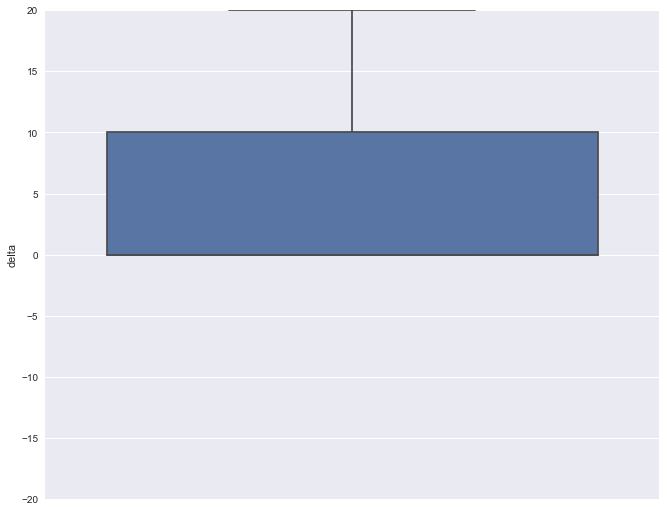

In [181]:
plt.ylim([-20,20])
sns.boxplot(y='delta',data=tsindex)

In [182]:
from collections import Counter

Counter(tsindex['delta'])

Counter({-5535210.0: 1,
         0.0: 283232,
         2.0: 4,
         3.0: 37,
         4.0: 8,
         5.0: 6,
         6.0: 734,
         7.0: 17897,
         8.0: 27832,
         9.0: 2869,
         10.0: 135357,
         12.0: 1,
         20.0: 84,
         30.0: 25,
         40.0: 15,
         50.0: 10,
         60.0: 5,
         70.0: 2,
         80.0: 1,
         90.0: 3,
         100.0: 3,
         110.0: 2,
         120.0: 2,
         130.0: 4,
         160.0: 2,
         170.0: 3,
         180.0: 2,
         190.0: 1,
         210.0: 2,
         230.0: 1,
         240.0: 1,
         260.0: 1,
         270.0: 4,
         280.0: 1,
         290.0: 2,
         300.0: 1,
         310.0: 2,
         320.0: 1,
         360.0: 1,
         400.0: 2,
         410.0: 1,
         420.0: 1,
         430.0: 1,
         460.0: 1,
         470.0: 2,
         490.0: 1,
         520.0: 1,
         540.0: 1,
         560.0: 1,
         580.0: 1,
         590.0: 1,
         610.0: 1,
       

In [183]:
pd.date_range(start=m5ts.index.min(), end=m5ts.index.max())

DatetimeIndex(['1970-01-01'], dtype='datetime64[ns]', freq='D')

In [184]:
daterangeDF = pd.DataFrame(tsindex.index)

In [185]:
daterangeDF

,ts
0,2012-05-30 20:05:00
1,2012-05-30 20:10:00
2,2012-05-30 20:15:00
3,2012-05-30 20:20:00
4,2012-05-30 20:25:00
5,2012-05-30 20:30:00
6,2012-05-30 20:35:00
7,2012-05-30 20:40:00
8,2012-05-30 20:45:00
9,2012-05-30 20:50:00


In [186]:
pd.date_range(min=daterangeDF['ts'].min(),max=)

SyntaxError: invalid syntax (<ipython-input-186-ecd1a4ea962d>, line 1)

In [187]:
## checking if any time is missed
print(tsindex.shape,'\n',daterangeDF.shape)

# change name of tsindex:
m5ts_tindex = tsindex

(468301, 4) 
 (468301, 1)


In [188]:
print(m5ts_tindex.head())
print

                           seq  t  m5kWh_tot  delta
ts                                                 
2012-05-30 20:05:00  999557609  2        0.0    0.0
2012-05-30 20:10:00  999557610  2        0.0    0.0
2012-05-30 20:15:00  999557611  2        0.0    0.0
2012-05-30 20:20:00  999557612  2        0.0    0.0
2012-05-30 20:25:00  999557613  2        0.0    0.0


<function print>

In [189]:
pd.to_datetime(m5ts_tindex.index)

DatetimeIndex(['2012-05-30 20:05:00', '2012-05-30 20:10:00',
               '2012-05-30 20:15:00', '2012-05-30 20:20:00',
               '2012-05-30 20:25:00', '2012-05-30 20:30:00',
               '2012-05-30 20:35:00', '2012-05-30 20:40:00',
               '2012-05-30 20:45:00', '2012-05-30 20:50:00',
               ...
               '2017-05-29 09:35:00', '2017-05-29 09:40:00',
               '2017-05-29 09:45:00', '2017-05-29 09:50:00',
               '2017-05-29 09:55:00', '2017-05-29 10:00:00',
               '2017-05-29 10:05:00', '2017-05-29 10:10:00',
               '2017-05-29 10:15:00', '2017-05-29 10:20:00'],
              dtype='datetime64[ns]', name='ts', length=468301, freq=None)

In [190]:
m5ts_tindex[m5ts_tindex.index.dt.minute ==5]

AttributeError: 'Index' object has no attribute 'dt'

In [191]:
pd.DatetimeIndex(m5ts_tindex.index)

DatetimeIndex(['2012-05-30 20:05:00', '2012-05-30 20:10:00',
               '2012-05-30 20:15:00', '2012-05-30 20:20:00',
               '2012-05-30 20:25:00', '2012-05-30 20:30:00',
               '2012-05-30 20:35:00', '2012-05-30 20:40:00',
               '2012-05-30 20:45:00', '2012-05-30 20:50:00',
               ...
               '2017-05-29 09:35:00', '2017-05-29 09:40:00',
               '2017-05-29 09:45:00', '2017-05-29 09:50:00',
               '2017-05-29 09:55:00', '2017-05-29 10:00:00',
               '2017-05-29 10:05:00', '2017-05-29 10:10:00',
               '2017-05-29 10:15:00', '2017-05-29 10:20:00'],
              dtype='datetime64[ns]', name='ts', length=468301, freq=None)

In [192]:
m5ts_tindex.index=pd.to_datetime(m5ts_tindex.index)

In [193]:
m5ts_tindex.index

DatetimeIndex(['2012-05-30 20:05:00', '2012-05-30 20:10:00',
               '2012-05-30 20:15:00', '2012-05-30 20:20:00',
               '2012-05-30 20:25:00', '2012-05-30 20:30:00',
               '2012-05-30 20:35:00', '2012-05-30 20:40:00',
               '2012-05-30 20:45:00', '2012-05-30 20:50:00',
               ...
               '2017-05-29 09:35:00', '2017-05-29 09:40:00',
               '2017-05-29 09:45:00', '2017-05-29 09:50:00',
               '2017-05-29 09:55:00', '2017-05-29 10:00:00',
               '2017-05-29 10:05:00', '2017-05-29 10:10:00',
               '2017-05-29 10:15:00', '2017-05-29 10:20:00'],
              dtype='datetime64[ns]', name='ts', length=468301, freq=None)

In [194]:
help(sns.tsplot)

Help on function tsplot in module seaborn.timeseries:

tsplot(data, time=None, unit=None, condition=None, value=None, err_style='ci_band', ci=68, interpolate=True, color=None, estimator=<function mean at 0x10eec0ea0>, n_boot=5000, err_palette=None, err_kws=None, legend=True, ax=None, **kwargs)
    Plot one or more timeseries with flexible representation of uncertainty.
    
    This function is intended to be used with data where observations are
    nested within sampling units that were measured at multiple timepoints.
    
    It can take data specified either as a long-form (tidy) DataFrame or as an
    ndarray with dimensions (unit, time) The interpretation of some of the
    other parameters changes depending on the type of object passed as data.
    
    Parameters
    ----------
    data : DataFrame or ndarray
        Data for the plot. Should either be a "long form" dataframe or an
        array with dimensions (unit, time, condition). In both cases, the
        condition fiel

In [195]:
m5ts_dtin = m5ts_tindex.reset_index()

In [196]:
m5ts_dtin.head()
m5ts_dtin = m5ts_dtin[8000]

KeyError: 8000

In [197]:
m5ts_dtin

,ts,seq,t,m5kWh_tot,delta
0,2012-05-30 20:05:00,999557609,2,0.0,0.0
1,2012-05-30 20:10:00,999557610,2,0.0,0.0
2,2012-05-30 20:15:00,999557611,2,0.0,0.0
3,2012-05-30 20:20:00,999557612,2,0.0,0.0
4,2012-05-30 20:25:00,999557613,2,0.0,0.0
5,2012-05-30 20:30:00,999557614,2,0.0,0.0
6,2012-05-30 20:35:00,999557615,2,0.0,0.0
7,2012-05-30 20:40:00,999557616,2,0.0,0.0
8,2012-05-30 20:45:00,999557617,2,0.0,0.0
9,2012-05-30 20:50:00,999557618,2,0.0,0.0


(0, 10)

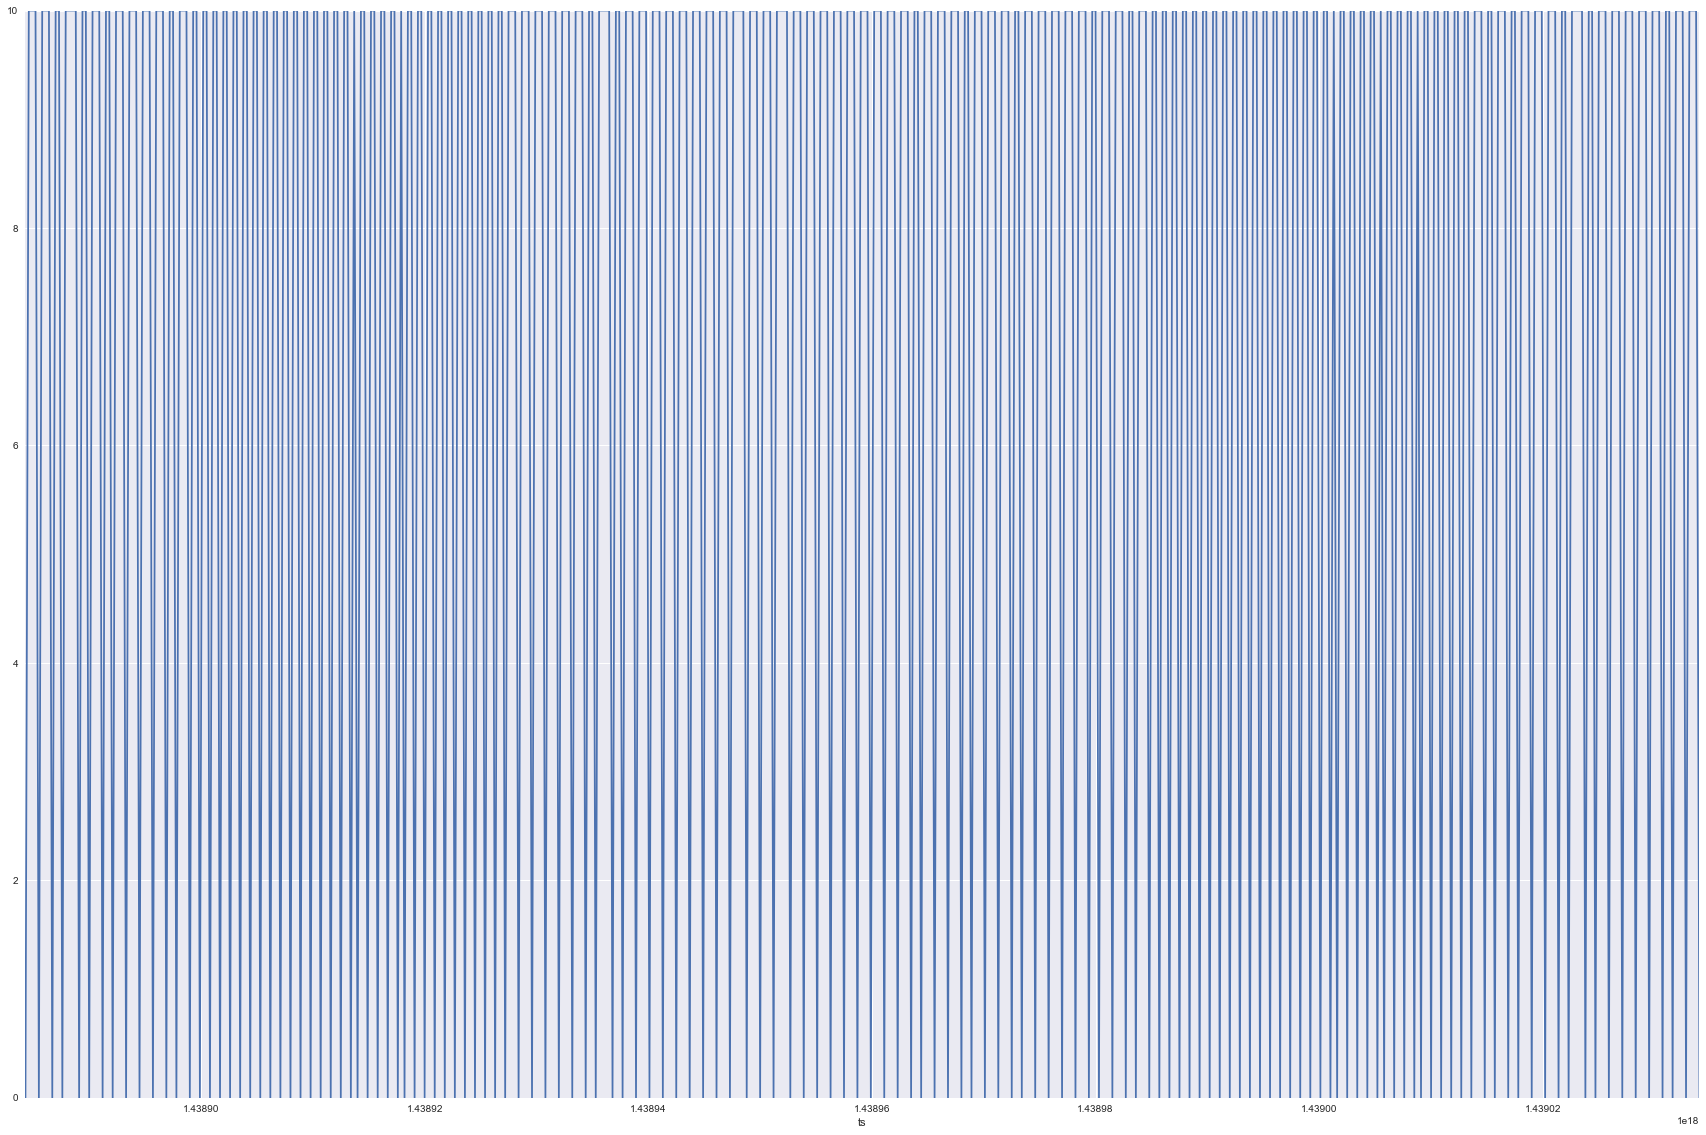

In [198]:
plt.figure(figsize=[30,20])
sns.tsplot(m5ts_tindex[300000:300500].delta,m5ts_tindex.index[300000:300500])
plt.ylim([0,10])


In [199]:
#Identifying seasonality with plots
monthly_cum = pd.DataFrame()
monthly_cum['delta_tot'] = m5ts_tindex.delta.resample('M').sum()

In [200]:
monthly_cum

,delta_tot
ts,
2012-05-31,0.0
2012-06-30,2507050.0
2012-07-31,108060.0
2012-08-31,67080.0
2012-09-30,75130.0
2012-10-31,11320.0
2012-11-30,119810.0
2012-12-31,55380.0
2013-01-31,82690.0


(-100000, 350000)

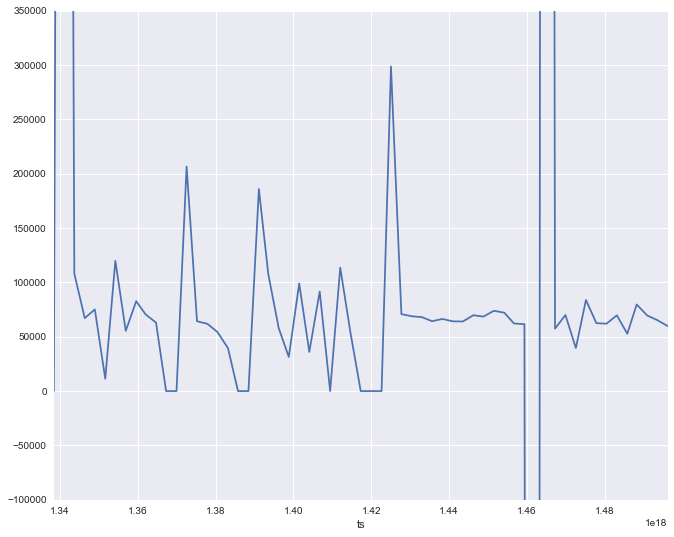

In [201]:
sns.tsplot(monthly_cum.delta_tot,monthly_cum.index)
plt.ylim([-100000,350000])

In [202]:
#Numeric summaries - autocorrelation = correlation between
#values at different time values. 


m5delta = pd.Series(m5ts_tindex['delta'])

print('autocorr: ',m5delta.autocorr(lag = 1))


autocorr:  -8.33519987311e-08


In [203]:
m5delta.autocorr(lag=1)


-8.3351998731071672e-08

In [204]:
print(type(m5delta))

<class 'pandas.core.series.Series'>


In [205]:
m5delta_day = m5delta.resample('D').sum()
m5delta_day

ts
2012-05-30          0.0
2012-05-31          0.0
2012-06-01          0.0
2012-06-02          0.0
2012-06-03          0.0
2012-06-04          0.0
2012-06-05          0.0
2012-06-06          0.0
2012-06-07          0.0
2012-06-08          0.0
2012-06-09          0.0
2012-06-10          0.0
2012-06-11    2494800.0
2012-06-12       2390.0
2012-06-13       2390.0
2012-06-14       2440.0
2012-06-15       2440.0
2012-06-16       2380.0
2012-06-17        210.0
2012-06-18          0.0
2012-06-19          0.0
2012-06-20          0.0
2012-06-21          0.0
2012-06-22          0.0
2012-06-23          0.0
2012-06-24          0.0
2012-06-25          0.0
2012-06-26          0.0
2012-06-27          0.0
2012-06-28          0.0
                ...    
2017-04-30       1975.0
2017-05-01       2102.0
2017-05-02       2155.0
2017-05-03       2202.0
2017-05-04       2220.0
2017-05-05       2203.0
2017-05-06       2148.0
2017-05-07       2050.0
2017-05-08       2237.0
2017-05-09       2234.0
2017-05-10   

In [206]:
m5delta_day.autocorr(lag=1)

6.328699979453322e-06

In [207]:
# application of rolling mean to
# smooth out the data and make
# trends more visible. 

m5delta_day_rm = m5delta_day.rolling(window = 30, center = True).mean()

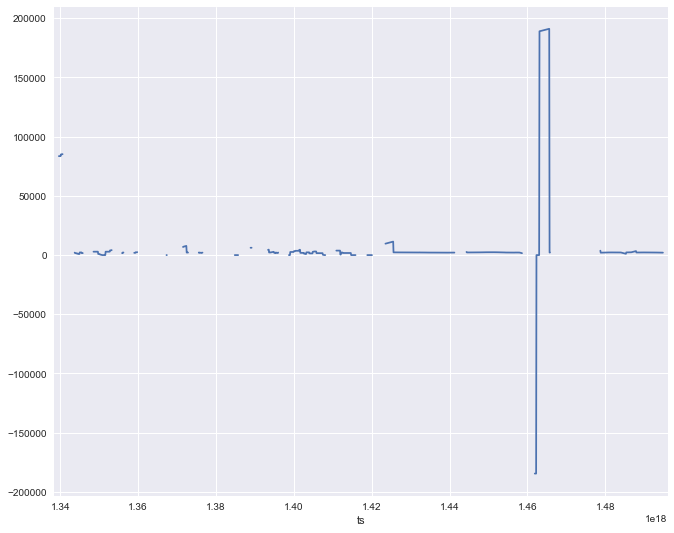

In [208]:


sns.tsplot(m5delta_day_rm, m5delta_day_rm.index)

In [209]:
# finding which lag gives highest correlation

autocorr_dict = {}
for i in range(1000):
    autocorr_dict[i] = m5delta_day.autocorr(lag=i)
    #print('i ',i,': ',m5delta_day.autocorr(lag = i))

print(autocorr_dict)

# every 39th day's value is correlated with R = -0.65

autocorr_series = pd.Series(autocorr_dict)

print('>0.09:\n',autocorr_series[autocorr_series>0.05])
print('<-0.09:\n',autocorr_series[autocorr_series<-0.09])

{0: 1.0, 1: 6.328699979453322e-06, 2: -2.779398720714207e-05, 3: 8.927138224713318e-06, 4: 2.2656021009369396e-05, 5: -0.00042568185019512033, 6: -0.00053990221647183491, 7: -0.00052719511157654731, 8: -0.0005535544721832743, 9: -0.00059008924293854582, 10: -0.00055273718594582219, 11: -0.00050096908602552436, 12: -0.00052775780661531296, 13: 9.6433523535501955e-05, 14: 9.4685668502625752e-05, 15: 0.00010128726376635436, 16: 4.2954323666761167e-05, 17: 5.9933330614475105e-05, 18: 4.6410034758042484e-05, 19: 8.1587623961732993e-05, 20: -2.9784070203488898e-05, 21: -9.1084318113559119e-05, 22: -0.0001198837978177161, 23: 0.0014668221501663095, 24: -9.0347976180595716e-05, 25: -4.0490089600966458e-05, 26: 0.00015792351058265306, 27: -9.0352830177282893e-05, 28: -0.00011759578349345017, 29: -3.186125716963836e-05, 30: -2.2968173384268681e-05, 31: 0.00028502615614291031, 32: -1.1198371985754269e-05, 33: -0.00013774127595970225, 34: -3.2532002366899075e-05, 35: 0.00039333497589514758, 36: 3.

(-0.1, 0.1)

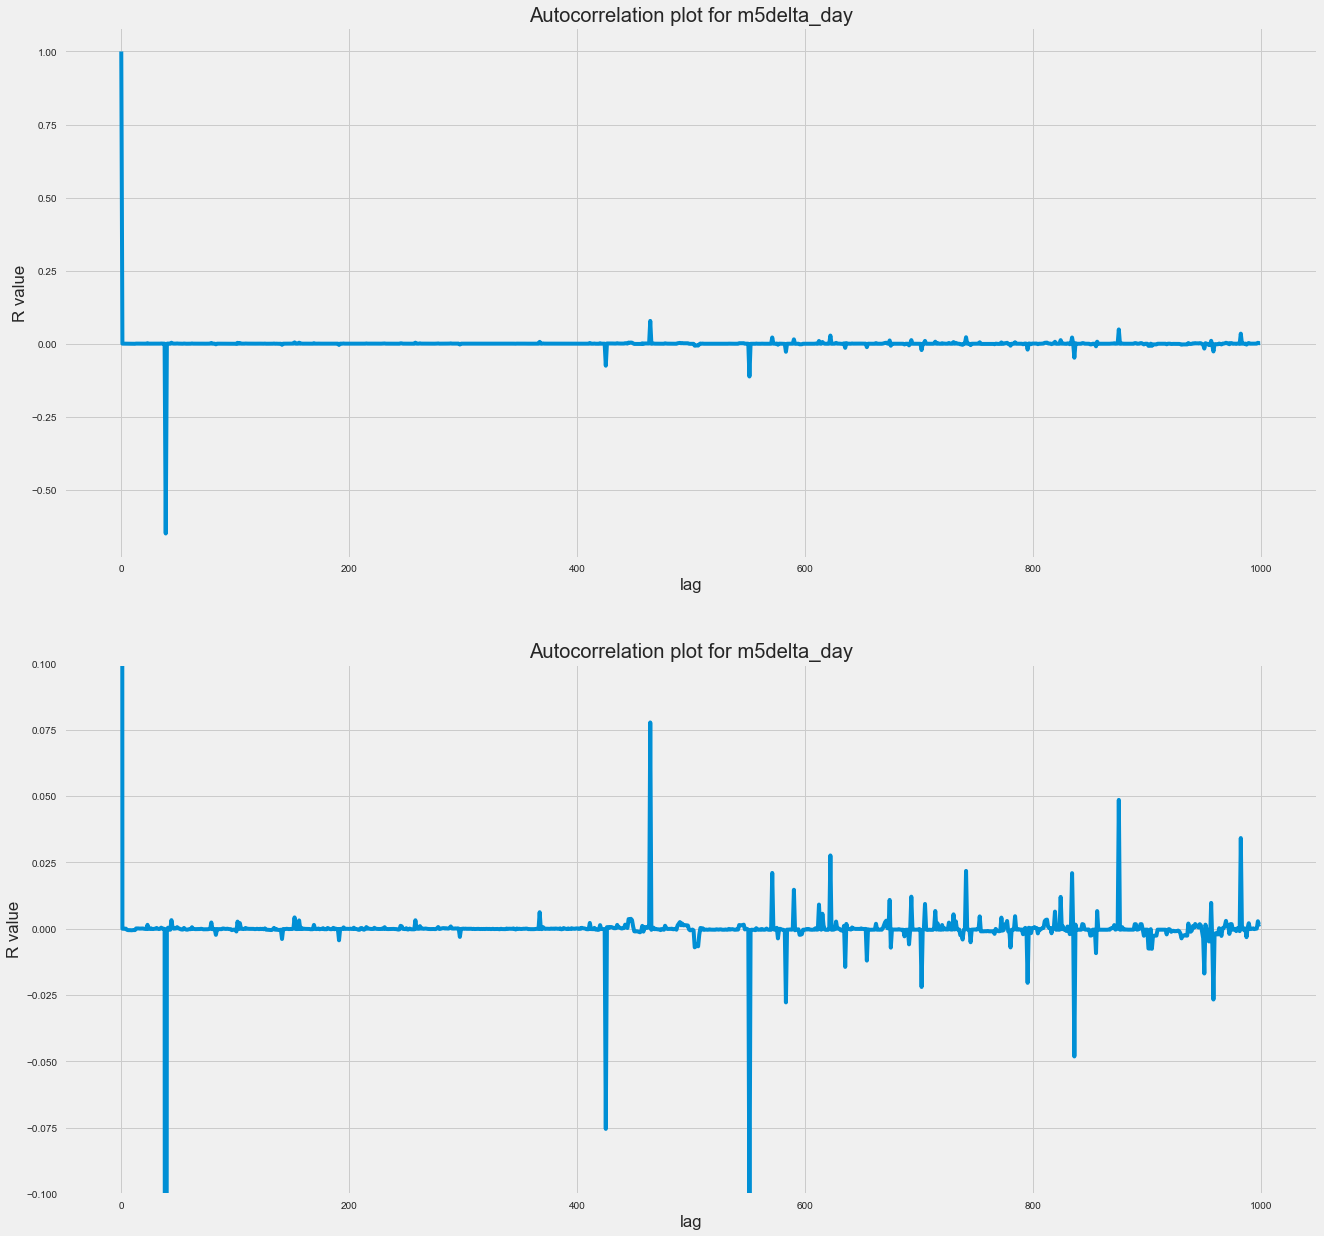

In [383]:
plt.figure(figsize=(20,20))

plt.subplot(2,1,1)
plt.plot(autocorr_series)
plt.xlabel('lag')
plt.ylabel('R value')
plt.title('Autocorrelation plot for m5delta_day')

plt.subplot(2,1,2)
plt.plot(autocorr_series)
plt.xlabel('lag')
plt.ylabel('R value')
plt.title('Autocorrelation plot for m5delta_day')
plt.ylim([-0.1,0.1])

In [386]:
autocorr_list = [m5delta.autocorr(lag = x) for x in range(m5delta.shape[0])]

/Users/MHK/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:2487: RuntimeWarning:

Degrees of freedom <= 0 for slice

/Users/MHK/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:2496: RuntimeWarning:

divide by zero encountered in double_scalars



In [385]:
m5delta.shape

(468301,)

#autocorrel for 5-minute wise data

m5deltamin_dict = {}
#m5delta = pd.Series(m5ts_tindex['delta'])


for i in range(len(m5delta)):
    m5deltamin_dict[i] = m5delta.autocorr(lag=i)

m5deltamin_series = pd.Series(m5deltamin_dict)

plt.plot(m5deltamin_series)

In [211]:
import math
logm5 = np.log(m5delta_day)
type(logm5)

/Users/MHK/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning:

divide by zero encountered in log

/Users/MHK/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning:

invalid value encountered in log



pandas.core.series.Series

(7.5, 8)

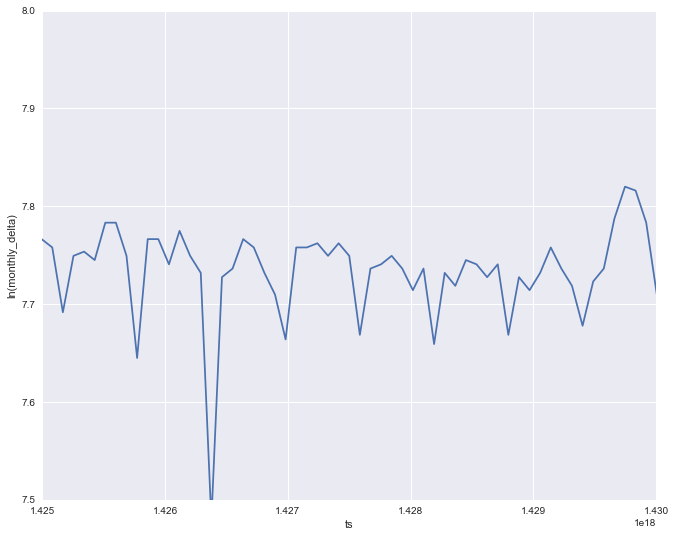

In [212]:
sns.tsplot(logm5, logm5.index)
plt.ylabel('ln(monthly_delta)')

# old data seems very noise, no apparent trend, but last 2 years' data seems like it follows a certain trend/value. will look into it more 
# fix the ts values to be dates, in the x-axis!
# each cycle represents a week, seems like it. 

plt.xlim([1.425e18,1.43e18])
plt.ylim([7.5,8])

In [213]:
m5deltaday_short = m5delta_day['2015']

(1500, 2500)

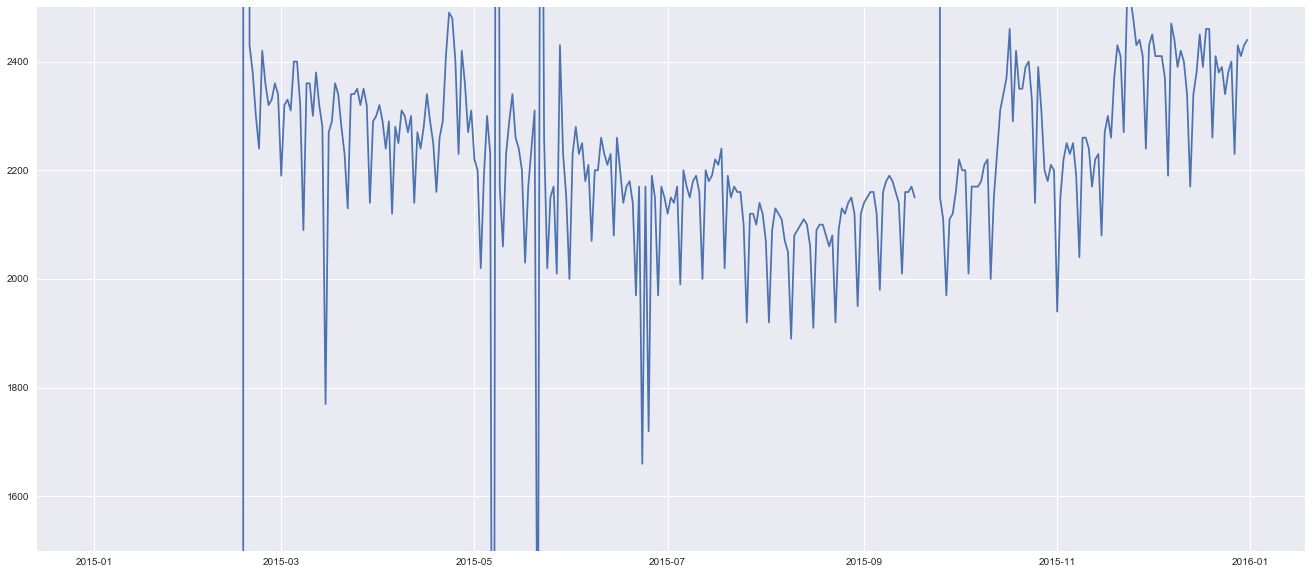

In [214]:
plt.figure(1)
plt.figure(figsize = [50,10])

plt.subplot(121)
plt.plot(m5deltaday_short)
plt.ylim([1500,2500])


#plt.subplot(122)
#plt.plot(m5delta_day)



In [215]:
import statsmodels.api as sm
from pylab import rcParams

In [216]:
rcParams['figure.figsize']=11,9

decomposition = sm.tsa.seasonal_decompose(m5deltaday_short,model='additive')
fig = decomposition.plot()


ValueError: This function does not handle missing values

In [218]:
m5delta_day.isnull().sum()

161

In [219]:
m5delta.isnull().sum()

0

In [220]:
m5delta

ts
2012-05-30 20:05:00    0.0
2012-05-30 20:10:00    0.0
2012-05-30 20:15:00    0.0
2012-05-30 20:20:00    0.0
2012-05-30 20:25:00    0.0
2012-05-30 20:30:00    0.0
2012-05-30 20:35:00    0.0
2012-05-30 20:40:00    0.0
2012-05-30 20:45:00    0.0
2012-05-30 20:50:00    0.0
2012-05-30 20:55:00    0.0
2012-05-30 21:00:00    0.0
2012-05-30 21:05:00    0.0
2012-05-30 21:10:00    0.0
2012-05-30 21:15:00    0.0
2012-05-30 21:20:00    0.0
2012-05-30 21:25:00    0.0
2012-05-30 21:30:00    0.0
2012-05-30 21:35:00    0.0
2012-05-30 21:40:00    0.0
2012-05-30 21:45:00    0.0
2012-05-30 21:50:00    0.0
2012-05-30 21:55:00    0.0
2012-05-30 22:00:00    0.0
2012-05-30 22:05:00    0.0
2012-05-30 22:10:00    0.0
2012-05-30 22:15:00    0.0
2012-05-30 22:20:00    0.0
2012-05-30 22:25:00    0.0
2012-05-30 22:30:00    0.0
                      ... 
2017-05-29 07:55:00    7.0
2017-05-29 08:00:00    8.0
2017-05-29 08:05:00    7.0
2017-05-29 08:10:00    8.0
2017-05-29 08:15:00    6.0
2017-05-29 08:20:00    8.

In [221]:
# finding how many datetime values are missing

# first create proper datetime range which includes all timestamps
import datetime
start = datetime.datetime(2012,5,30,20,5,0)
end = datetime.datetime(2017,5,29,10,20,0)

proper_datetime = pd.date_range(start, end, freq='5min')

# how many datetime values in proper range are actually there in the dataset
exist = proper_datetime.isin(m5delta.index).sum()
dontexist = m5delta.shape - exist

print('exist: ',exist)
print('dontexist: ',dontexist)
print('total: ', m5delta.shape)



exist:  465754
dontexist:  [2547]
total:  (468301,)


In [222]:
m5ts

,seq,t,ts,m5kWh_tot,delta
0,999557609,2,2012-05-30 20:05:00,0.0,0.0
1,999557610,2,2012-05-30 20:10:00,0.0,0.0
2,999557611,2,2012-05-30 20:15:00,0.0,0.0
3,999557612,2,2012-05-30 20:20:00,0.0,0.0
4,999557613,2,2012-05-30 20:25:00,0.0,0.0
5,999557614,2,2012-05-30 20:30:00,0.0,0.0
6,999557615,2,2012-05-30 20:35:00,0.0,0.0
7,999557616,2,2012-05-30 20:40:00,0.0,0.0
8,999557617,2,2012-05-30 20:45:00,0.0,0.0
9,999557618,2,2012-05-30 20:50:00,0.0,0.0


In [223]:
help(pd.date_range)

Help on function date_range in module pandas.core.indexes.datetimes:

date_range(start=None, end=None, periods=None, freq='D', tz=None, normalize=False, name=None, closed=None, **kwargs)
    Return a fixed frequency datetime index, with day (calendar) as the default
    frequency
    
    Parameters
    ----------
    start : string or datetime-like, default None
        Left bound for generating dates
    end : string or datetime-like, default None
        Right bound for generating dates
    periods : integer or None, default None
        If None, must specify start and end
    freq : string or DateOffset, default 'D' (calendar daily)
        Frequency strings can have multiples, e.g. '5H'
    tz : string or None
        Time zone name for returning localized DatetimeIndex, for example
        Asia/Hong_Kong
    normalize : bool, default False
        Normalize start/end dates to midnight before generating date range
    name : str, default None
        Name of the resulting index
  

In [224]:
cleanDF_dict[2]

,seq,t,ts,m5kWh_tot,delta
0,999557609,2,2012-05-30 20:05:00.100,0.0,0.0
1,999557610,2,2012-05-30 20:10:00.100,0.0,0.0
2,999557611,2,2012-05-30 20:15:00.100,0.0,0.0
3,999557612,2,2012-05-30 20:20:00.000,0.0,0.0
4,999557613,2,2012-05-30 20:25:00.100,0.0,0.0
5,999557614,2,2012-05-30 20:30:00.000,0.0,0.0
6,999557615,2,2012-05-30 20:35:00.100,0.0,0.0
7,999557616,2,2012-05-30 20:40:00.100,0.0,0.0
8,999557617,2,2012-05-30 20:45:00.100,0.0,0.0
9,999557618,2,2012-05-30 20:50:00.000,0.0,0.0


In [227]:
import datetime as dt

m5ts_recheck = cleanDF_dict[2]
print('nunique before to_datetime: \n',m5ts_recheck.apply(nunique_percolumn))

m5ts_recheck['ts']=pd.to_datetime(m5ts_recheck.ts)
print('nunique and info() after to_datetime, before strf: \n',m5ts_recheck.apply(nunique_percolumn))
m5ts_recheck.info()

m5ts_recheck['ts']=m5ts_recheck['ts'].dt.strftime('%Y-%m-%d %H:%M:%S')
print('nunique after strftime: \n',m5ts_recheck.apply(nunique_percolumn))

nunique before to_datetime: 
 seq          468380
t                 1
ts           468347
m5kWh_tot    185088
delta           172
dtype: int64
nunique and info() after to_datetime, before strf: 
 seq          468380
t                 1
ts           468347
m5kWh_tot    185088
delta           172
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468380 entries, 0 to 468379
Data columns (total 5 columns):
seq          468380 non-null int64
t            468380 non-null int64
ts           468380 non-null datetime64[ns]
m5kWh_tot    468380 non-null float64
delta        468380 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 17.9 MB
nunique after strftime: 
 seq          468380
t                 1
ts           468301
m5kWh_tot    185088
delta           172
dtype: int64


In [228]:
m5ts_recheck

,seq,t,ts,m5kWh_tot,delta
0,999557609,2,2012-05-30 20:05:00,0.0,0.0
1,999557610,2,2012-05-30 20:10:00,0.0,0.0
2,999557611,2,2012-05-30 20:15:00,0.0,0.0
3,999557612,2,2012-05-30 20:20:00,0.0,0.0
4,999557613,2,2012-05-30 20:25:00,0.0,0.0
5,999557614,2,2012-05-30 20:30:00,0.0,0.0
6,999557615,2,2012-05-30 20:35:00,0.0,0.0
7,999557616,2,2012-05-30 20:40:00,0.0,0.0
8,999557617,2,2012-05-30 20:45:00,0.0,0.0
9,999557618,2,2012-05-30 20:50:00,0.0,0.0


In [229]:
m5ts_recheck_red = m5ts_recheck
m5ts_rerecheck_red = m5ts_recheck
m5ts_recheck_red=m5ts_recheck_red.drop_duplicates(subset=['ts'],keep='first')
#m5ts_rerecheck_red=m5ts_rerecheck_red.drop_duplicates(subset=['t','ts','m5kWh_tot','delta'])
m5ts_rerecheck_red=m5ts_rerecheck_red.drop_duplicates(subset=['t','ts','delta'])
donexist_recheck = proper_datetime.isin(m5ts_recheck.ts).sum() - m5ts_recheck.shape[0]
donexist_recheckred = proper_datetime.isin(m5ts_recheck_red.ts).sum() - m5ts_recheck_red.shape[0]
donexist_rerecheckred = proper_datetime.isin(m5ts_rerecheck_red.ts).sum() - m5ts_rerecheck_red.shape[0]

print('\nshape before dropping duplicates:\n', m5ts_recheck.shape)
print('\nnunique before dropping duplicates:\n', m5ts_recheck.apply(nunique_percolumn))
print('\nnunique after dropping duplicates:\n', m5ts_recheck_red.apply(nunique_percolumn))
print('\nshape after dropping duplicates:\n',m5ts_recheck_red.shape)
print('\nrerecheck_red nunique:\n',m5ts_rerecheck_red.apply(nunique_percolumn))
print('\nnumber that dont exist in recheck (before any dropping): ',donexist_recheck)
print('\nnumber that dont exist in recheck after dropping: ',donexist_recheckred)
print('\nnumber that dont exist in recheck after dropping based on multcolumns: ',donexist_rerecheckred)

# ok to remove duplicates based on ts subset only, since it is not worth the time
#...to explore the small (27 or 28) rows which have duplicate ts but diff...
#...vals or deltas


shape before dropping duplicates:
 (468380, 5)

nunique before dropping duplicates:
 seq          468380
t                 1
ts           468301
m5kWh_tot    185088
delta           172
dtype: int64

nunique after dropping duplicates:
 seq          468301
t                 1
ts           468301
m5kWh_tot    185070
delta           171
dtype: int64

shape after dropping duplicates:
 (468301, 5)

rerecheck_red nunique:
 seq          468311
t                 1
ts           468301
m5kWh_tot    185075
delta           172
dtype: int64

number that dont exist in recheck (before any dropping):  -2626

number that dont exist in recheck after dropping:  -2547

number that dont exist in recheck after dropping based on multcolumns:  -2557


In [235]:
m5delta_rc = m5ts_recheck['delta']
m5delta_rc = pd.DataFrame(m5delta_rc)
m5delta_rc

,delta
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0
6,0.0
7,0.0
8,0.0
9,0.0


###### New resample of m5delta so as to continue following ' A Guide to Time Series Vizualization with Python 3' tutorial

In [236]:
# put missing datetimestamps in m5ts_recheck, with NaNs for corressponding delta vals
# first visualize the missing timestamps. 
import datetime
start = datetime.datetime(2012,5,30,20,5,0)
end = datetime.datetime(2017,5,29,10,20,0)

proper_datetime = pd.date_range(start, end, freq='5min')

print('\nsize of proper_datetime: ',proper_datetime.shape)
print('\nsize of m5delta_rc: ',m5delta_rc.shape)
print('\nnumber of missing 5min timestamps = ',proper_datetime.shape[0]-m5delta_rc.shape[0])

#57183 is 12% of original dataset. 
#After appending missing timestamps fillna with what? see notebook 07/07 - fill with 
#...288-observations forward rolling mean


size of proper_datetime:  (525484,)

size of m5delta_rc:  (468380, 1)

number of missing 5min timestamps =  57104


In [237]:
proper_datetime = pd.DataFrame(proper_datetime)
proper_datetime.rename(columns={0:'ts'},inplace=True)

In [239]:
m5delta_rc.index=pd.to_datetime(m5ts_recheck.ts)
proper_datetime.ts = pd.to_datetime(proper_datetime.ts)

In [243]:
m5delta_rc

,delta
2012-05-30 20:05:00,0.0
2012-05-30 20:10:00,0.0
2012-05-30 20:15:00,0.0
2012-05-30 20:20:00,0.0
2012-05-30 20:25:00,0.0
2012-05-30 20:30:00,0.0
2012-05-30 20:35:00,0.0
2012-05-30 20:40:00,0.0
2012-05-30 20:45:00,0.0
2012-05-30 20:50:00,0.0


In [244]:
not_m5drc = m5delta_rc.index.isin(proper_datetime['ts'])

not_m5drc = not_m5drc == False
not_m5drc.sum()

print(m5delta_rc.loc[not_m5drc==True])

                     delta
2013-03-10 03:12:00    0.0
2014-03-09 03:12:00    0.0
2014-03-13 09:20:03    0.0
2014-11-02 03:12:00    0.0
2014-12-29 02:05:01    0.0
2014-12-29 02:10:01    0.0
2014-12-29 02:15:01    0.0
2014-12-29 02:20:01    0.0
2014-12-29 02:30:01    0.0
2014-12-29 02:35:01    0.0
2014-12-29 02:50:01    0.0
2014-12-29 02:55:01    0.0
2014-12-29 03:10:01    0.0
2014-12-29 03:15:02    0.0
2014-12-29 03:20:01    0.0
2014-12-29 03:40:02    0.0
2014-12-29 03:45:01    0.0
2014-12-29 03:50:01    0.0
2014-12-29 03:55:01    0.0
2014-12-29 04:05:01    0.0
2014-12-29 04:10:01    0.0
2014-12-29 04:15:02    0.0
2014-12-29 04:40:01    0.0
2014-12-29 04:50:01    0.0
2014-12-29 04:55:01    0.0
2014-12-29 05:00:01    0.0
2014-12-29 05:20:01    0.0
2014-12-29 05:40:01    0.0
2014-12-29 05:45:01    0.0
2014-12-29 05:50:01    0.0
...                    ...
2015-09-03 04:10:01   10.0
2015-09-03 04:15:01    0.0
2015-09-03 04:45:01    0.0
2015-09-03 04:50:01   10.0
2015-09-03 04:55:01   10.0
2

In [245]:
#practice working with datetime and timedelta objects: 


dt_eg = datetime.datetime.now()
dt_eg_strf = dt_eg.strftime('%Y-%m-%d %H:%M:%S')
dt_eg = datetime.datetime.strptime(dt_eg_strf,'%Y-%m-%d %H:%M:%S')
print('datetime object: ',dt_eg)

deltadt = datetime.timedelta(seconds= dt_eg.second)
print('timedelta object: ',deltadt)

dt_eg -= deltadt
print('datetime object after op: ',dt_eg)


datetime object:  2017-07-14 13:26:11
timedelta object:  0:00:11
datetime object after op:  2017-07-14 13:26:00


In [246]:
m5delta_rc
not_m5drc

zeromins_dict={}

for i,dt in enumerate(m5delta_rc.index):
    zeromins_dict[i]=dt.replace(second=0)
    
zeromins = pd.Series(zeromins_dict)

In [247]:
zeromins = pd.DataFrame(zeromins)
old_index = m5delta_rc.index
m5delta_rc.index = zeromins.loc[:,0]
m5ts_recheck.index = zeromins.loc[:,0]
del m5delta_rc.index.name
del m5ts_recheck.index.name

# updating not_drc
not_drc = m5delta_rc.index.isin(proper_datetime['ts'])
not_drc = not_drc == False
m5delta_rc.loc[not_drc==True] # to check...few enough to delete completely
m5ts_recheck.loc[not_drc==True]

m5ts_recheck['ts']=m5ts_recheck.index

print(m5delta_rc.apply(nunique_percolumn))
print(m5ts_recheck.apply(nunique_percolumn))
m5ts_recheck_index = pd.DataFrame(m5ts_recheck.index)
print(m5ts_recheck_index.apply(nunique_percolumn))

m5ts_recheck = m5ts_recheck

delta    172
dtype: int64
seq          468380
t                 1
ts           468294
m5kWh_tot    185088
delta           172
dtype: int64
0    468294
dtype: int64


In [248]:
m5ts_recheck.apply(nunique_percolumn)

m5ts_recheck.drop_duplicates(subset = 'ts', keep='first',inplace=True)

# drop those that are in m5ts_recheck, but not in proper_datetime:
not_drc = m5ts_recheck.index.isin(proper_datetime['ts'])
not_drc = not_drc == False
m5ts_recheck = m5ts_recheck.loc[not_drc==False]
m5delta_rc = m5ts_recheck['delta']

print(m5ts_recheck.shape)
print(m5delta_rc.shape)

print('0 if none that are in m5delta_rc are not in proper_datetime: ',((m5delta_rc.index.isin(proper_datetime))).sum())
print('However, number that are in proper_datetime but not in m5delta_rc:\n')
print((~(proper_datetime['ts'].isin(m5delta_rc.index))).sum())


(468289, 5)
(468289,)
0 if none that are in m5delta_rc are not in proper_datetime:  0
However, number that are in proper_datetime but not in m5delta_rc:

57195


In [249]:
notinm5 = (~(proper_datetime['ts'].isin(m5delta_rc.index)))
dt_notinm5 = proper_datetime.loc[notinm5]
dt_notinm5
delta_notinm5 = dt_notinm5
delta_notinm5['delta']=np.nan
delta_notinm5.set_index('ts',inplace=True)
del delta_notinm5.index.name

/Users/MHK/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [250]:
delta_notinm5

,delta
2012-06-11 04:55:00,NaN
2012-06-11 05:00:00,NaN
2012-06-11 05:05:00,NaN
2012-06-11 05:10:00,NaN
2012-06-11 05:15:00,NaN
2012-06-11 05:20:00,NaN
2012-06-11 05:25:00,NaN
2012-06-11 05:30:00,NaN
2012-06-11 05:35:00,NaN
2012-06-11 05:40:00,NaN


In [251]:
m5delta_rc = pd.DataFrame(m5delta_rc)
m5delta_rc

,delta
2012-05-30 20:05:00,0.0
2012-05-30 20:10:00,0.0
2012-05-30 20:15:00,0.0
2012-05-30 20:20:00,0.0
2012-05-30 20:25:00,0.0
2012-05-30 20:30:00,0.0
2012-05-30 20:35:00,0.0
2012-05-30 20:40:00,0.0
2012-05-30 20:45:00,0.0
2012-05-30 20:50:00,0.0


In [252]:
allin_concat = pd.concat([m5delta_rc, delta_notinm5])

In [253]:
allin_concat

,delta
2012-05-30 20:05:00,0.0
2012-05-30 20:10:00,0.0
2012-05-30 20:15:00,0.0
2012-05-30 20:20:00,0.0
2012-05-30 20:25:00,0.0
2012-05-30 20:30:00,0.0
2012-05-30 20:35:00,0.0
2012-05-30 20:40:00,0.0
2012-05-30 20:45:00,0.0
2012-05-30 20:50:00,0.0


In [259]:
allin_concat['delta'].isnull()

2012-05-30 20:05:00    False
2012-05-30 20:10:00    False
2012-05-30 20:15:00    False
2012-05-30 20:20:00    False
2012-05-30 20:25:00    False
2012-05-30 20:30:00    False
2012-05-30 20:35:00    False
2012-05-30 20:40:00    False
2012-05-30 20:45:00    False
2012-05-30 20:50:00    False
2012-05-30 20:55:00    False
2012-05-30 21:00:00    False
2012-05-30 21:05:00    False
2012-05-30 21:10:00    False
2012-05-30 21:15:00    False
2012-05-30 21:20:00    False
2012-05-30 21:25:00    False
2012-05-30 21:30:00    False
2012-05-30 21:35:00    False
2012-05-30 21:40:00    False
2012-05-30 21:45:00    False
2012-05-30 21:50:00    False
2012-05-30 21:55:00    False
2012-05-30 22:00:00    False
2012-05-30 22:05:00    False
2012-05-30 22:10:00    False
2012-05-30 22:15:00    False
2012-05-30 22:20:00    False
2012-05-30 22:25:00    False
2012-05-30 22:30:00    False
                       ...  
2016-10-26 16:20:00     True
2016-10-26 16:25:00     True
2016-10-26 16:30:00     True
2016-10-26 16:

In [260]:
allin_concat['ts']=allin_concat.index
print(allin_concat.apply(nunique_percolumn))
print(allin_concat.shape)

#verify that concatenation done properly:
correct_shape = delta_notinm5.shape[0]
print(correct_shape)
print(correct_shape-allin_concat.loc[allin_concat.delta.isnull()].shape[0])

#therefore, concat ok - no duplicates since size = nunique, and all concatenated


delta       171
ts       525484
dtype: int64
(525484, 2)
57195
0


In [261]:
dt_notinm5['ts']=dt_notinm5.index
dt_notinm5

/Users/MHK/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,delta,ts
2012-06-11 04:55:00,NaN,2012-06-11 04:55:00
2012-06-11 05:00:00,NaN,2012-06-11 05:00:00
2012-06-11 05:05:00,NaN,2012-06-11 05:05:00
2012-06-11 05:10:00,NaN,2012-06-11 05:10:00
2012-06-11 05:15:00,NaN,2012-06-11 05:15:00
2012-06-11 05:20:00,NaN,2012-06-11 05:20:00
2012-06-11 05:25:00,NaN,2012-06-11 05:25:00
2012-06-11 05:30:00,NaN,2012-06-11 05:30:00
2012-06-11 05:35:00,NaN,2012-06-11 05:35:00
2012-06-11 05:40:00,NaN,2012-06-11 05:40:00


In [542]:
help(pd.DataFrame.sort_index)

Help on function sort_index in module pandas.core.frame:

sort_index(self, axis=0, level=None, ascending=True, inplace=False, kind='quicksort', na_position='last', sort_remaining=True, by=None)
    Sort object by labels (along an axis)
    
    Parameters
    ----------
    axis : index, columns to direct sorting
    level : int or level name or list of ints or list of level names
        if not None, sort on values in specified index level(s)
    ascending : boolean, default True
        Sort ascending vs. descending
    inplace : bool, default False
        if True, perform operation in-place
    kind : {'quicksort', 'mergesort', 'heapsort'}, default 'quicksort'
         Choice of sorting algorithm. See also ndarray.np.sort for more
         information.  `mergesort` is the only stable algorithm. For
         DataFrames, this option is only applied when sorting on a single
         column or label.
    na_position : {'first', 'last'}, default 'last'
         `first` puts NaNs at the 

In [263]:
# order by timestamp index after concatenation:
allin_concat=allin_concat.sort_index()
print('numna: ',allin_concat.apply(numna))

all_m5delta = allin_concat    

numna:  delta    57195
ts           0
dtype: int64


In [278]:
test_fill = all_m5delta 

In [279]:
test_fill

,delta,ts
2012-05-30 20:05:00,0.0,2012-05-30 20:05:00
2012-05-30 20:10:00,0.0,2012-05-30 20:10:00
2012-05-30 20:15:00,0.0,2012-05-30 20:15:00
2012-05-30 20:20:00,0.0,2012-05-30 20:20:00
2012-05-30 20:25:00,0.0,2012-05-30 20:25:00
2012-05-30 20:30:00,0.0,2012-05-30 20:30:00
2012-05-30 20:35:00,0.0,2012-05-30 20:35:00
2012-05-30 20:40:00,0.0,2012-05-30 20:40:00
2012-05-30 20:45:00,0.0,2012-05-30 20:45:00
2012-05-30 20:50:00,0.0,2012-05-30 20:50:00


In [275]:
test_fill.delta.fillna(test_fill.delta.rolling(window=10).mean())

2012-05-30 20:05:00    0.0
2012-05-30 20:10:00    0.0
2012-05-30 20:15:00    0.0
2012-05-30 20:20:00    0.0
2012-05-30 20:25:00    0.0
2012-05-30 20:30:00    0.0
2012-05-30 20:35:00    0.0
2012-05-30 20:40:00    0.0
2012-05-30 20:45:00    0.0
2012-05-30 20:50:00    0.0
2012-05-30 20:55:00    0.0
2012-05-30 21:00:00    0.0
2012-05-30 21:05:00    0.0
2012-05-30 21:10:00    0.0
2012-05-30 21:15:00    0.0
2012-05-30 21:20:00    0.0
2012-05-30 21:25:00    0.0
2012-05-30 21:30:00    0.0
2012-05-30 21:35:00    0.0
2012-05-30 21:40:00    0.0
2012-05-30 21:45:00    0.0
2012-05-30 21:50:00    0.0
2012-05-30 21:55:00    0.0
2012-05-30 22:00:00    0.0
2012-05-30 22:05:00    0.0
2012-05-30 22:10:00    0.0
2012-05-30 22:15:00    0.0
2012-05-30 22:20:00    0.0
2012-05-30 22:25:00    0.0
2012-05-30 22:30:00    0.0
                      ... 
2017-05-29 07:55:00    7.0
2017-05-29 08:00:00    8.0
2017-05-29 08:05:00    7.0
2017-05-29 08:10:00    8.0
2017-05-29 08:15:00    6.0
2017-05-29 08:20:00    8.0
2

In [282]:
from collections import Counter
print(Counter(test_fill.delta))
test_fill.apply(numna)

Counter({0.0: 283221, 10.0: 135356, 8.0: 27832, 7.0: 17897, 9.0: 2869, 6.0: 734, 20.0: 84, 3.0: 37, 30.0: 25, 40.0: 15, 50.0: 10, 4.0: 8, 5.0: 6, 60.0: 5, 270.0: 4, 130.0: 4, 2.0: 4, 100.0: 3, 860.0: 3, 90.0: 3, 170.0: 3, 210.0: 2, 290.0: 2, 820.0: 2, 1800.0: 2, 70.0: 2, 180.0: 2, 1090.0: 2, 310.0: 2, 400.0: 2, 2510.0: 2, 470.0: 2, 1110.0: 2, 120.0: 2, 670.0: 2, 160.0: 2, 110.0: 2, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, 2493430.0: 1, 42290.0: 1, 6980.0: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, na

delta    57195
ts           0
dtype: int64

In [314]:
test_fill2 = all_m5delta['delta']
test_fill2 = pd.DataFrame(test_fill2)
print('numna before applying fillna:\n', test_fill2.apply(numna))

test_fill2.interpolate(inplace=True)

# test_fill2 = test_fill2.rolling(window=5,min_periods=1,center=True).mean()
# test_fill2.fillna(method = ffill)

print('numna after applying fillna:\n', test_fill2.apply(numna))

full_m5delta = test_fill2

numna before applying fillna:
 delta    57195
dtype: int64
numna after applying fillna:
 delta    0
dtype: int64


,delta
count,5.719500e+04
mean,7.583347e+03
std,1.659513e+04
min,0.000000e+00
25%,0.000000e+00
50%,7.107692e+02
75%,1.103302e+04
max,2.834595e+06


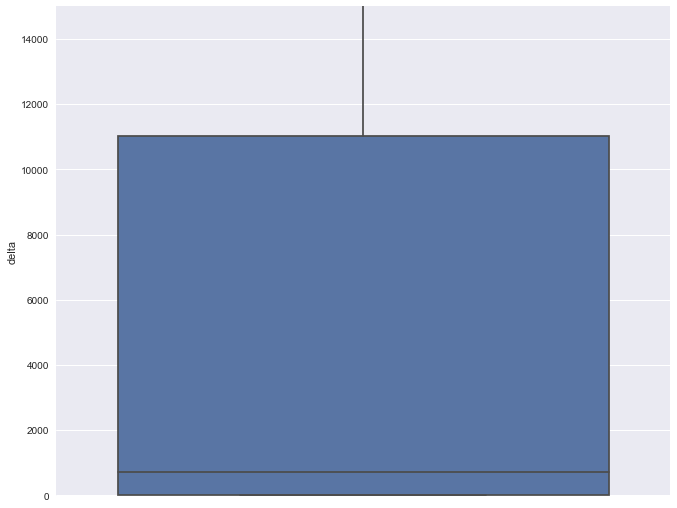

In [321]:
# boxplot of the interpolated values to see what numbers taken

interpolated_values = full_m5delta[full_m5delta.index.isin(dt_notinm5.index)]
sns.boxplot(y='delta',data=interpolated_values)
plt.ylim([-10,15000])
interpolated_values.describe()


In [327]:
full_m5deltaday = full_m5delta.resample('D').sum()

In [330]:
full_m5deltaday

,delta
2012-05-30,0.0
2012-05-31,0.0
2012-06-01,0.0
2012-06-02,0.0
2012-06-03,0.0
2012-06-04,0.0
2012-06-05,0.0
2012-06-06,0.0
2012-06-07,0.0
2012-06-08,0.0


In [334]:
full_m5deltaday.describe()

,delta
count,1.826000e+03
mean,2.410626e+05
std,1.298708e+06
min,-5.535210e+06
25%,0.000000e+00
50%,1.970000e+03
75%,2.240000e+03
max,1.428178e+07


(0, 3000)

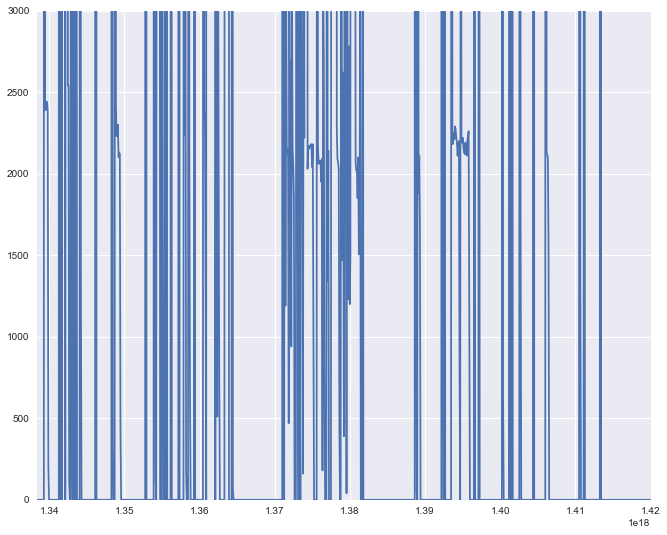

In [345]:
sns.tsplot(full_m5deltaday[:'2014'].delta,full_m5deltaday[:'2014'].index)
plt.ylim([0,3000])

(-100, 1000)

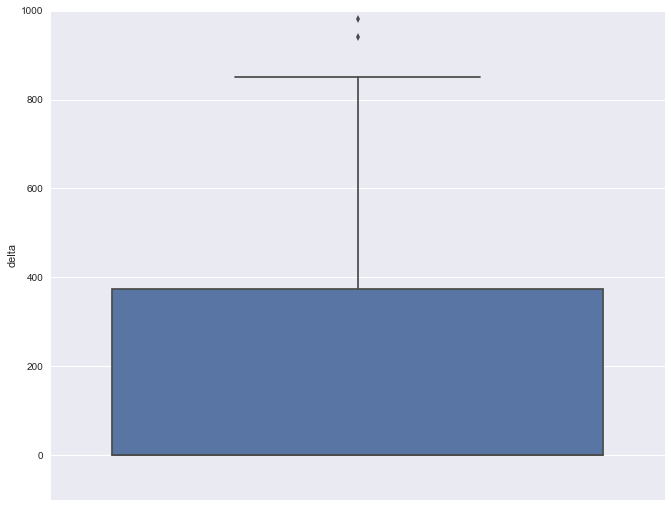

In [356]:
sns.boxplot(y='delta',data=full_m5deltaday[:'2014'])
plt.ylim(-100,1000)

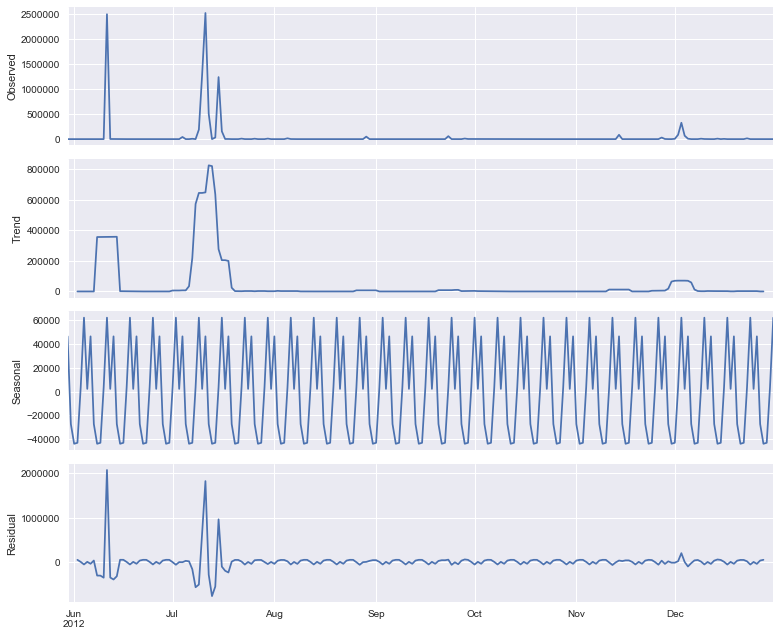

In [361]:
import statsmodels.api as sm
from pylab import rcParams

rcParams['figure.figsize']=11,9

decomposition = sm.tsa.seasonal_decompose(full_m5deltaday['2012'],model='additive')
fig = decomposition.plot()


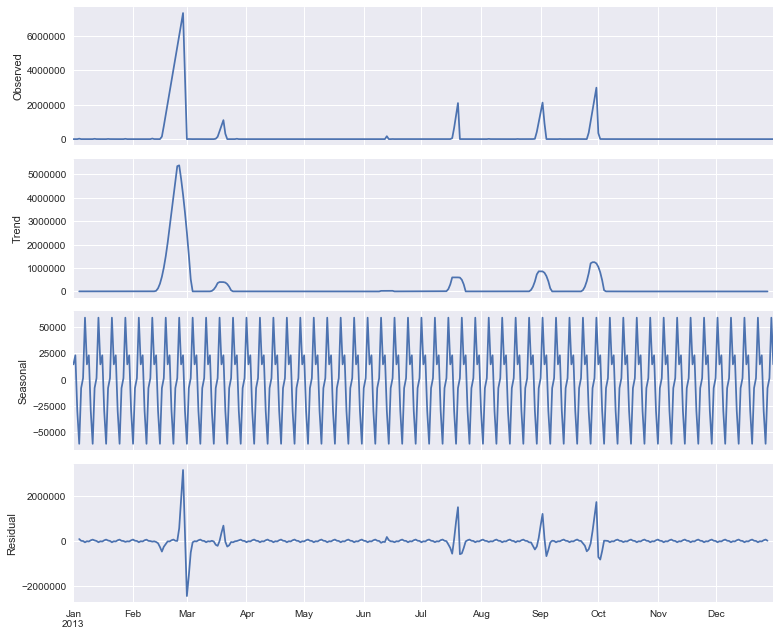

In [368]:
import statsmodels.api as sm
from pylab import rcParams

rcParams['figure.figsize']=11,9

decomposition = sm.tsa.seasonal_decompose(full_m5deltaday['2013'],model='additive')
fig = decomposition.plot()


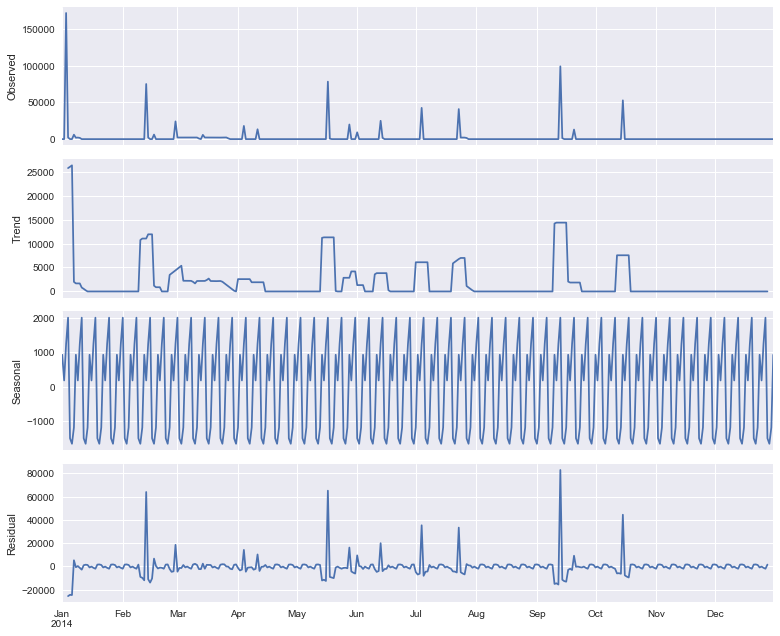

In [360]:
import statsmodels.api as sm
from pylab import rcParams

rcParams['figure.figsize']=11,9

decomposition = sm.tsa.seasonal_decompose(full_m5deltaday['2014'],model='additive')
fig = decomposition.plot()


(1500, 3000)

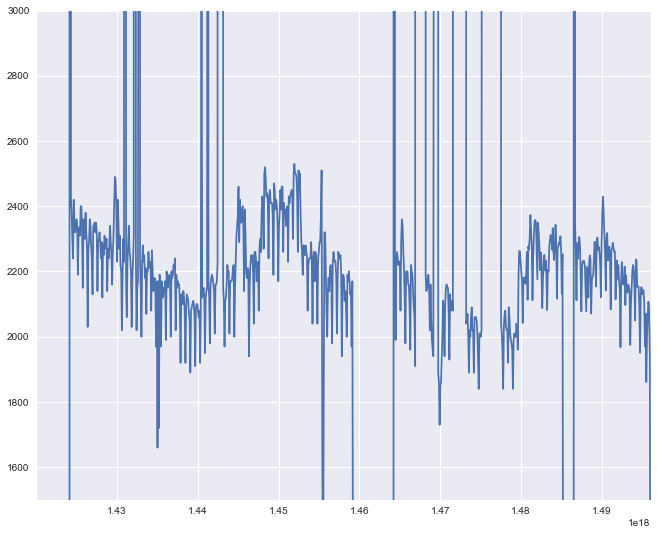

In [357]:
sns.tsplot(full_m5deltaday['2015':'2017'].delta,full_m5deltaday['2015':'2017'].index)
plt.ylim([1500,3000])

(1500, 3000)

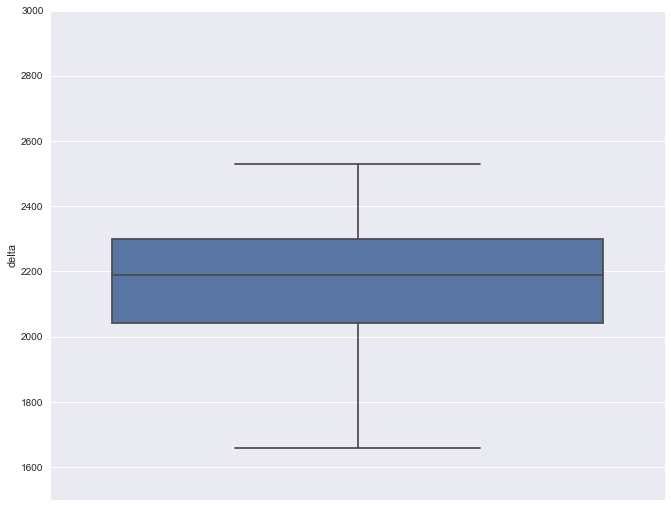

In [358]:
sns.boxplot(y='delta',data=full_m5deltaday['2015':'2017'])
plt.ylim(1500,3000)

import statsmodels.api as sm
from pylab import rcParams

rcParams['figure.figsize']=11,9

decomposition = sm.tsa.seasonal_decompose(full_m5deltaday['2015':'2017'],model='additive')
fig = decomposition.plot()



(1500, 3000)

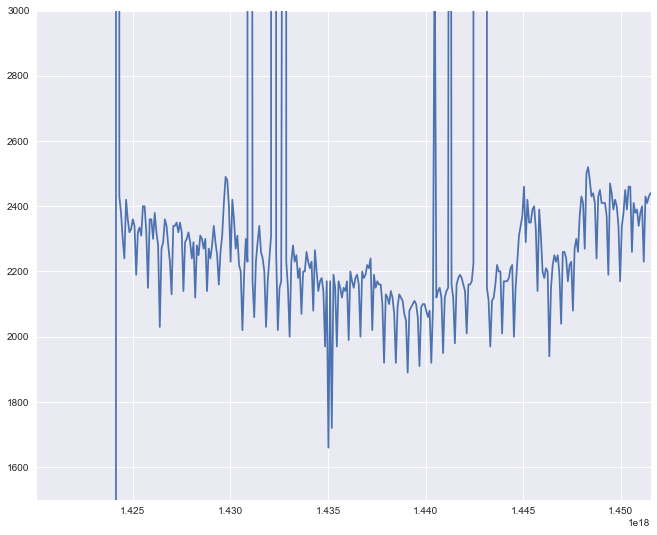

In [370]:
sns.tsplot(full_m5deltaday['2015'].delta,full_m5deltaday['2015'].index)
plt.ylim([1500,3000])

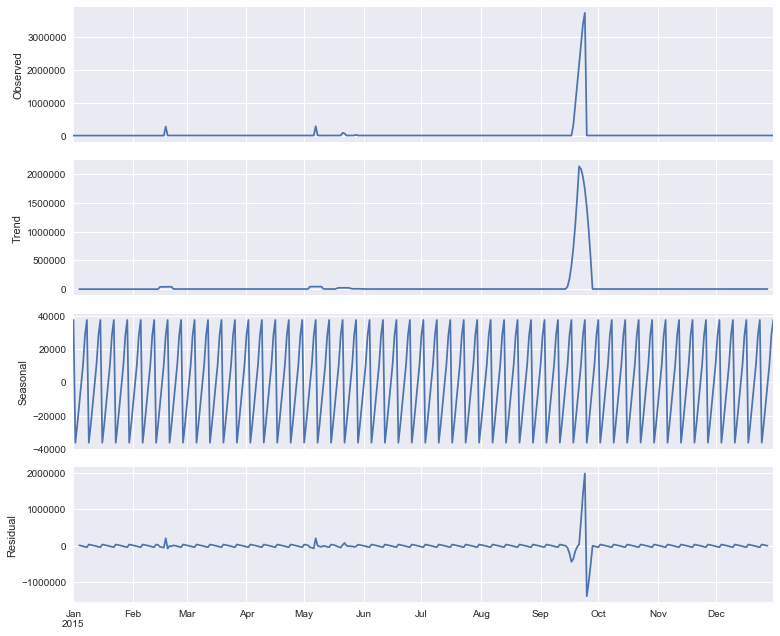

In [363]:
import statsmodels.api as sm
from pylab import rcParams

rcParams['figure.figsize']=11,9

decomposition = sm.tsa.seasonal_decompose(full_m5deltaday['2015'],model='additive')
fig = decomposition.plot()


(1500, 3000)

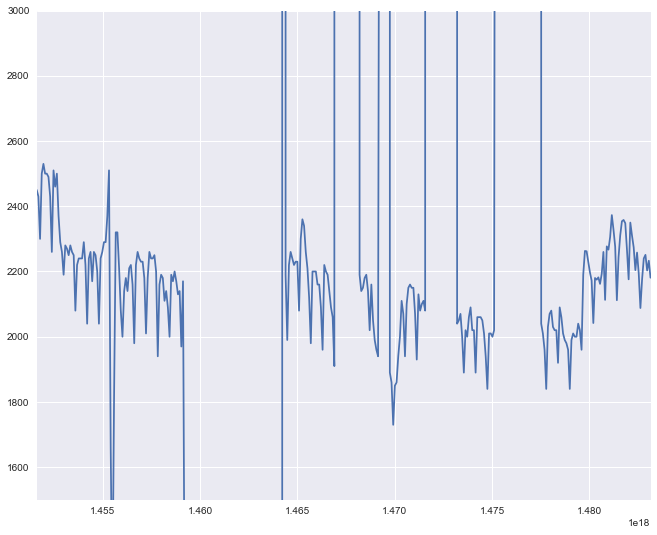

In [371]:
sns.tsplot(full_m5deltaday['2016'].delta,full_m5deltaday['2016'].index)
plt.ylim([1500,3000])

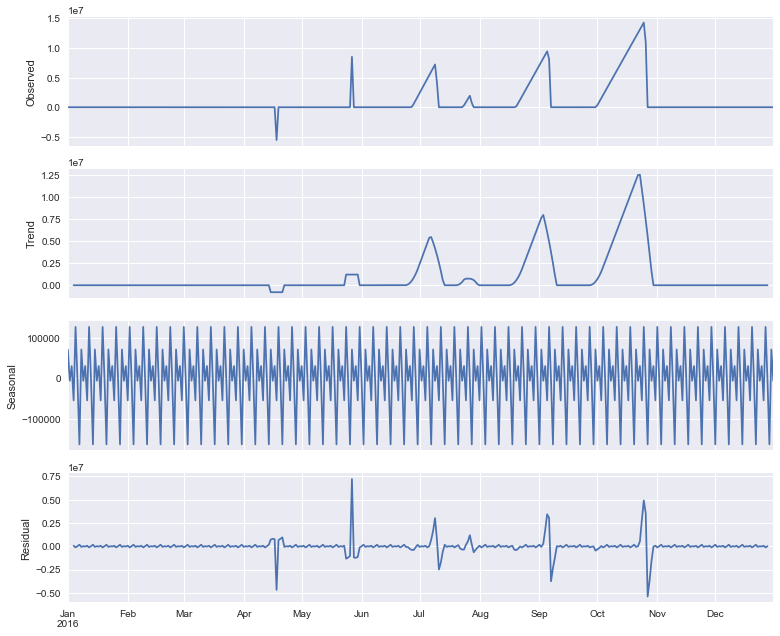

In [364]:
import statsmodels.api as sm
from pylab import rcParams

rcParams['figure.figsize']=11,9

decomposition = sm.tsa.seasonal_decompose(full_m5deltaday['2016'],model='additive')
fig = decomposition.plot()


(1500, 3000)

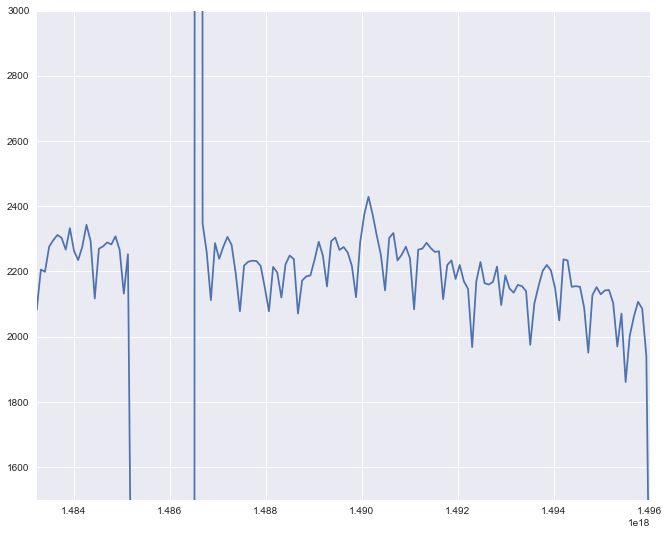

In [372]:
sns.tsplot(full_m5deltaday['2017'].delta,full_m5deltaday['2017'].index)
plt.ylim([1500,3000])

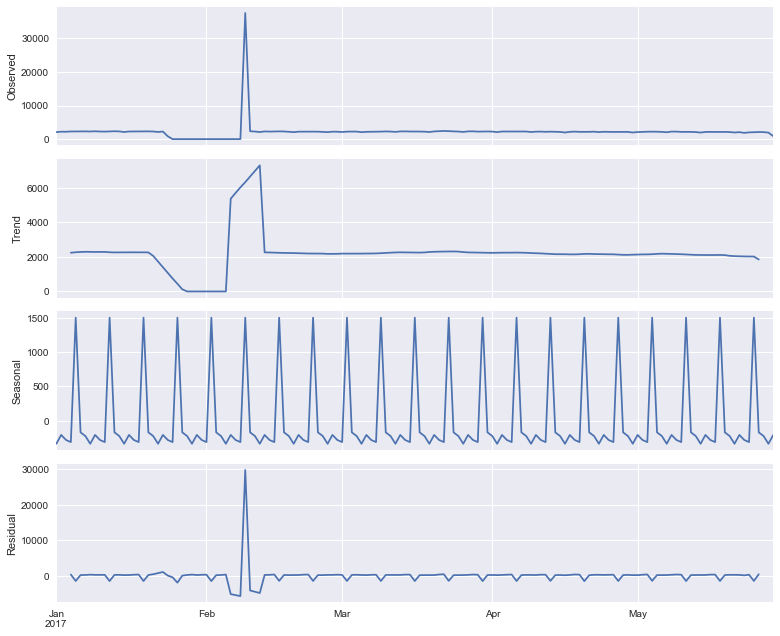

In [366]:
import statsmodels.api as sm
from pylab import rcParams

rcParams['figure.figsize']=11,9

decomposition = sm.tsa.seasonal_decompose(full_m5deltaday['2017'],model='additive')
fig = decomposition.plot()


In [373]:
'''
- There exist several residual values that don't contribute to
    trend or seasonality
- Weekly seasonality exists with peaks in the middle of weeks; can
    resample based on business days and see if true

'''



"\n- There exist several residual values that don't contribute to\n    trend or seasonality\n- Weekly seasonality exists with peaks in the middle of weeks; can\n    resample based on business days and see if true\n\n"

In [379]:
full_m5delta.to_csv('full_m5delta.csv')